In [1006]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import auc, roc_curve, accuracy_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import calibration_curve
import warnings

from scipy import stats
#from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import SVC

In [1007]:
pd.options.display.float_format = '{:.5f}'.format

In [1008]:
#Load data

df = pd.read_csv("Data_Assas_2023.csv").drop(columns= "Unnamed: 0")
print("Shape : ", df.shape)
print("Colonnes : ", df.columns)
df.head()

Shape :  (150000, 11)
Colonnes :  Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.76613,45,2,0.80298,9120.00000,13,0,6,0,2.00000
1,0,0.95715,40,0,0.12188,2600.00000,4,0,0,0,1.00000
2,0,0.65818,38,1,0.08511,3042.00000,2,1,0,0,0.00000
3,0,0.23381,30,0,0.03605,3300.00000,5,0,0,0,0.00000
4,0,0.90724,49,1,0.02493,63588.00000,7,0,1,0,0.00000


In [1009]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [1010]:
#Look for descriptive statistics :

df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.00000,150000.00000,150000.00000,150000.00000,150000.00000,120269.00000,150000.00000,150000.00000,150000.00000,150000.00000,146076.00000
mean,0.06684,6.04844,52.29521,0.42103,353.00508,6670.22124,8.45276,0.26597,1.01824,0.24039,0.75722
std,0.24975,249.75537,14.77187,4.19278,2037.81852,14384.67422,5.14595,4.16930,1.12977,4.15518,1.11509
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,0.02987,41.00000,0.00000,0.17507,3400.00000,5.00000,0.00000,0.00000,0.00000,0.00000
50%,0.00000,0.15418,52.00000,0.00000,0.36651,5400.00000,8.00000,0.00000,1.00000,0.00000,0.00000
75%,0.00000,0.55905,63.00000,0.00000,0.86825,8249.00000,11.00000,0.00000,2.00000,0.00000,1.00000
max,1.00000,50708.00000,109.00000,98.00000,329664.00000,3008750.00000,58.00000,98.00000,54.00000,98.00000,20.00000


## We investigate late in paiement

In [1011]:
df[['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse','NumberOfTimes90DaysLate' ]].describe()

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate
count,150000.00000,150000.00000,150000.00000
mean,0.42103,0.24039,0.26597
std,4.19278,4.15518,4.16930
min,0.00000,0.00000,0.00000
25%,0.00000,0.00000,0.00000
50%,0.00000,0.00000,0.00000
75%,0.00000,0.00000,0.00000
max,98.00000,98.00000,98.00000


In [1012]:
print("values for range 30-59 days : ", df['NumberOfTime30-59DaysPastDueNotWorse'].unique())
print("values for range 60-89 days : ", df['NumberOfTime60-89DaysPastDueNotWorse'].unique())
print("values for range 90 days : ", df['NumberOfTimes90DaysLate'].unique())

values for range 30-59 days :  [ 2  0  1  3  4  5  7 10  6 98 12  8  9 96 13 11]
values for range 60-89 days :  [ 0  1  2  5  3 98  4  6  7  8 96 11  9]
values for range 90 days :  [ 0  1  3  2  5  4 98 10  9  6  7  8 15 96 11 13 14 17 12]


In [1013]:
# We notice that we always have the following values : 96 and 98, how many individuals are concerned ?

print(df.loc[df["NumberOfTime30-59DaysPastDueNotWorse"] > 90].shape)
print(df.loc[df["NumberOfTime60-89DaysPastDueNotWorse"] > 90].shape)
print(df.loc[df["NumberOfTimes90DaysLate"] > 90].shape)

#We Will replace these valeues by their max
print("Max 30-59days late : ", df["NumberOfTime30-59DaysPastDueNotWorse"].max())
print("Max 60-89days late : ", df["NumberOfTime60-89DaysPastDueNotWorse"].max())
print("Max 90 days late : ", df["NumberOfTimes90DaysLate"].max())

df.loc[df["NumberOfTime30-59DaysPastDueNotWorse"] > 90,"NumberOfTime30-59DaysPastDueNotWorse"] = 13
df.loc[df['NumberOfTime60-89DaysPastDueNotWorse'] > 90,'NumberOfTime60-89DaysPastDueNotWorse'] = 11
df.loc[df["NumberOfTimes90DaysLate"] > 90,"NumberOfTimes90DaysLate"] = 17

(269, 11)
(269, 11)
(269, 11)
Max 30-59days late :  98
Max 60-89days late :  98
Max 90 days late :  98


# Investigation of Total balance on Credit Cards and personal lines of Credit

In [1014]:
# A ratio > 1 represents a serious defaulter
df["RevolvingUtilizationOfUnsecuredLines"].describe()

count   150000.00000
mean         6.04844
std        249.75537
min          0.00000
25%          0.02987
50%          0.15418
75%          0.55905
max      50708.00000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [1015]:
# Looking at the quantile, we notice outliers. We fix our treshold to 10

df = df[df["RevolvingUtilizationOfUnsecuredLines"] <= 10]
df['RevolvingUtilizationOfUnsecuredLines'].describe()

count   149759.00000
mean         0.32276
std          0.36675
min          0.00000
25%          0.02978
50%          0.15354
75%          0.55594
max          8.85185
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

# Looking at the Debt Ratio

In [1016]:
df["DebtRatio"].describe()

count   149759.00000
mean       352.65279
std       2038.20323
min          0.00000
25%          0.17496
50%          0.36648
75%          0.86695
max     329664.00000
Name: DebtRatio, dtype: float64

In [1017]:
# Looking at the quantile, we notice high increase between 0,8 and 0,825.
df["DebtRatio"].quantile([0.75, 0.8, 0.825, 0.85, 0.9])

0.75000      0.86695
0.80000      4.00000
0.82500     44.00000
0.85000    266.30000
0.90000   1265.00000
Name: DebtRatio, dtype: float64

In [1018]:
# We will thus investigate individuals before the 0.8 quantile treshold
df = df[df["DebtRatio"] < df["DebtRatio"].quantile(0.8)]
df.shape

(119763, 11)

# Looking at the Monthly Income

In [1019]:
df["MonthlyIncome"].describe()

count    117623.00000
mean       6799.84160
std       14511.72059
min           0.00000
25%        3500.00000
50%        5483.00000
75%        8333.00000
max     3008750.00000
Name: MonthlyIncome, dtype: float64

In [1020]:
# Looking at the quantile. If they are outliers as suggest by the max in the above cell, they are concentrate on the top of the distriution
df["MonthlyIncome"].quantile([0.75, 0.8, 0.825, 0.85, 0.9, 0.95, 0.97, 0.98, 0.99])

0.75000    8333.00000
0.80000    9166.00000
0.82500    9750.00000
0.85000   10200.00000
0.90000   11700.00000
0.95000   14700.00000
0.97000   17100.68000
0.98000   19800.00000
0.99000   25000.00000
Name: MonthlyIncome, dtype: float64

In [1021]:
# check the proportion of defaulter in the top of the distribution. 4% of individuals saw their credits refuses which is less than the total population. We expects that outliers in monthly income if they existt 
# not have a significant impact on the results

df.loc[df["MonthlyIncome"] > df["MonthlyIncome"].quantile(0.99)].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,1161.00000,1161.00000,1161.00000,1161.00000,1161.00000,1161.00000,1161.00000,1161.00000,1161.00000,1161.00000,1161.00000
mean,0.05340,0.30538,53.29630,0.28424,0.15778,58206.45392,11.52283,0.06718,2.11111,0.05943,1.32558
std,0.22493,0.35638,11.42683,0.81695,0.16997,130951.27120,6.61905,0.59070,2.61769,0.43440,1.37243
min,0.00000,0.00000,25.00000,0.00000,0.00000,25001.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,0.03921,45.00000,0.00000,0.03341,29400.00000,7.00000,0.00000,1.00000,0.00000,0.00000
50%,0.00000,0.16787,53.00000,0.00000,0.11519,35365.00000,10.00000,0.00000,2.00000,0.00000,1.00000
75%,0.00000,0.49539,62.00000,0.00000,0.23178,52000.00000,15.00000,0.00000,3.00000,0.00000,2.00000
max,1.00000,5.36114,94.00000,13.00000,1.65779,3008750.00000,57.00000,17.00000,32.00000,11.00000,7.00000


In [1022]:
# It seems that the high wages are not outliers, so we will keep them

Mi_out = df.loc[df["MonthlyIncome"]>1000000]
Mi_out.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,4.00000,4.00000,4.00000,4.00000,4.00000,4.00000,4.00000,4.00000,4.00000,4.00000,4.00000
mean,0.00000,0.16005,52.00000,0.25000,0.00320,1858852.50000,11.50000,0.00000,2.00000,0.00000,1.50000
std,0.00000,0.21941,11.31371,0.50000,0.00137,823420.83997,2.64575,0.00000,1.41421,0.00000,1.29099
min,0.00000,0.00000,44.00000,0.00000,0.00147,1072500.00000,9.00000,0.00000,1.00000,0.00000,0.00000
25%,0.00000,0.00550,44.00000,0.00000,0.00245,1438200.00000,9.75000,0.00000,1.00000,0.00000,0.75000
50%,0.00000,0.08559,48.00000,0.00000,0.00339,1677080.00000,11.00000,0.00000,1.50000,0.00000,1.50000
75%,0.00000,0.24015,56.00000,0.25000,0.00414,2097732.50000,12.75000,0.00000,2.50000,0.00000,2.25000
max,0.00000,0.46903,68.00000,1.00000,0.00454,3008750.00000,15.00000,0.00000,4.00000,0.00000,3.00000


# Handle NAs

In [1023]:
#Check for Missing values :

MV = df.isna().sum().reset_index().rename(columns= {0 : "Missing Values"})
MV.to_excel("output/Missing_values.xlsx")

In [1024]:
# We have reduced our NAs number by our process, but some of them are still there. Thus, We will replace NA in Monthly Income by the median and the NA in Dependents by 0

df["MonthlyIncome"] = df["MonthlyIncome"].fillna(df["MonthlyIncome"].median())
df["NumberOfDependents"] = df["NumberOfDependents"].fillna(0)

# Export

In [1025]:
df.to_csv("Credit_Risk_clean.csv", ";")

# Descriptive Statistics

In [1026]:
# Clean Datafram of outliers for splitting

df_clean = df.copy()

print("Dimension : ", df_clean.shape)
df_clean.describe()

Dimension :  (119763, 11)


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,119763.00000,119763.00000,119763.00000,119763.00000,119763.00000,119763.00000,119763.00000,119763.00000,119763.00000,119763.00000,119763.00000
mean,0.06975,0.33460,51.49329,0.28424,0.35809,6776.31145,8.66745,0.12577,1.03673,0.08878,0.83825
std,0.25472,0.36628,14.60366,0.91450,0.36804,14382.54084,5.20220,0.90117,1.13750,0.59245,1.14258
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,0.03326,41.00000,0.00000,0.13360,3500.00000,5.00000,0.00000,0.00000,0.00000,0.00000
50%,0.00000,0.17508,51.00000,0.00000,0.28733,5483.00000,8.00000,0.00000,1.00000,0.00000,0.00000
75%,0.00000,0.58283,62.00000,0.00000,0.46716,8250.00000,11.00000,0.00000,2.00000,0.00000,1.00000
max,1.00000,8.85185,105.00000,13.00000,3.99401,3008750.00000,57.00000,17.00000,32.00000,11.00000,20.00000


# Age

In [1027]:
age_desc = df_clean["age"].describe().reset_index()
age_desc.to_excel("output/age_desc.xlsx")

Text(0.5, 1.0, 'Distribution of Age')

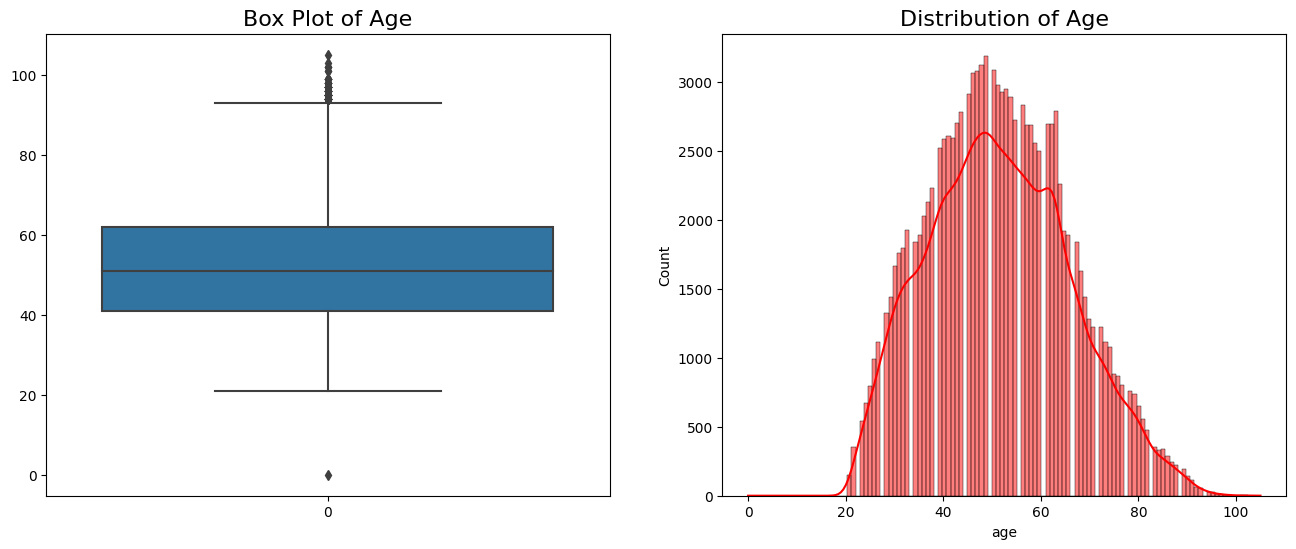

In [1028]:
fig, axes = plt.subplots(1,2,figsize = (16, 6))
sns.boxplot(df_clean['age'], ax = axes[0])
axes[0].set_title('Box Plot of Age', size=16)
sns.histplot(df_clean['age'], kde=True, color='red',ax=axes[1])
axes[1].set_title('Distribution of Age', size=16)

# RevolvingUtilizationOfUnsecuredLines

In [1029]:
RUUL_desc = df_clean["RevolvingUtilizationOfUnsecuredLines"].describe().reset_index()
RUUL_desc.to_excel("output/RULL_desc.xlsx")
RUUL_desc

,index,RevolvingUtilizationOfUnsecuredLines
0,count,119763.00000
1,mean,0.33460
2,std,0.36628
3,min,0.00000
4,25%,0.03326
5,50%,0.17508
6,75%,0.58283
7,max,8.85185


Text(0.5, 1.0, 'Distribution of RevolvingUtilizationOfUnsecuredLines')

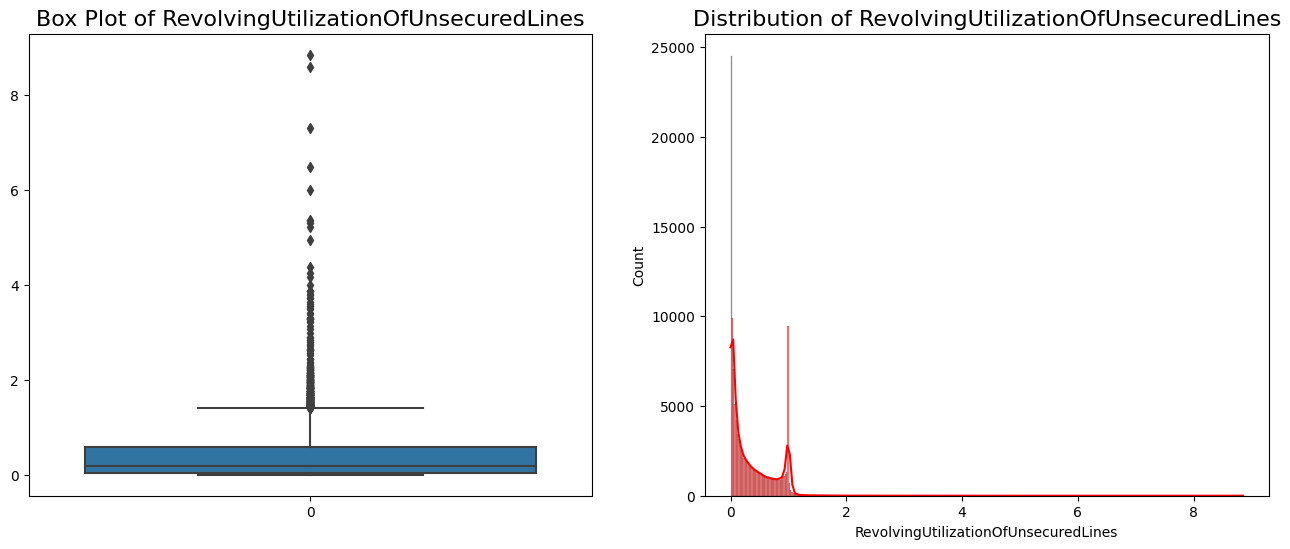

In [1030]:
fig, axes = plt.subplots(1,2,figsize = (16, 6))
sns.boxplot(df_clean['RevolvingUtilizationOfUnsecuredLines'], ax = axes[0])
axes[0].set_title('Box Plot of RevolvingUtilizationOfUnsecuredLines', size=16)
sns.histplot(df_clean['RevolvingUtilizationOfUnsecuredLines'], kde=True, color='red',ax=axes[1])
axes[1].set_title('Distribution of RevolvingUtilizationOfUnsecuredLines', size=16)

# DebtRatio	

In [1031]:
DR_desc = df_clean["DebtRatio"].describe().reset_index()
DR_desc.to_excel("output/DR_desc.xlsx")
DR_desc

,index,DebtRatio
0,count,119763.00000
1,mean,0.35809
2,std,0.36804
3,min,0.00000
4,25%,0.13360
5,50%,0.28733
6,75%,0.46716
7,max,3.99401


Text(0.5, 1.0, 'Distribution of DebtRatio')

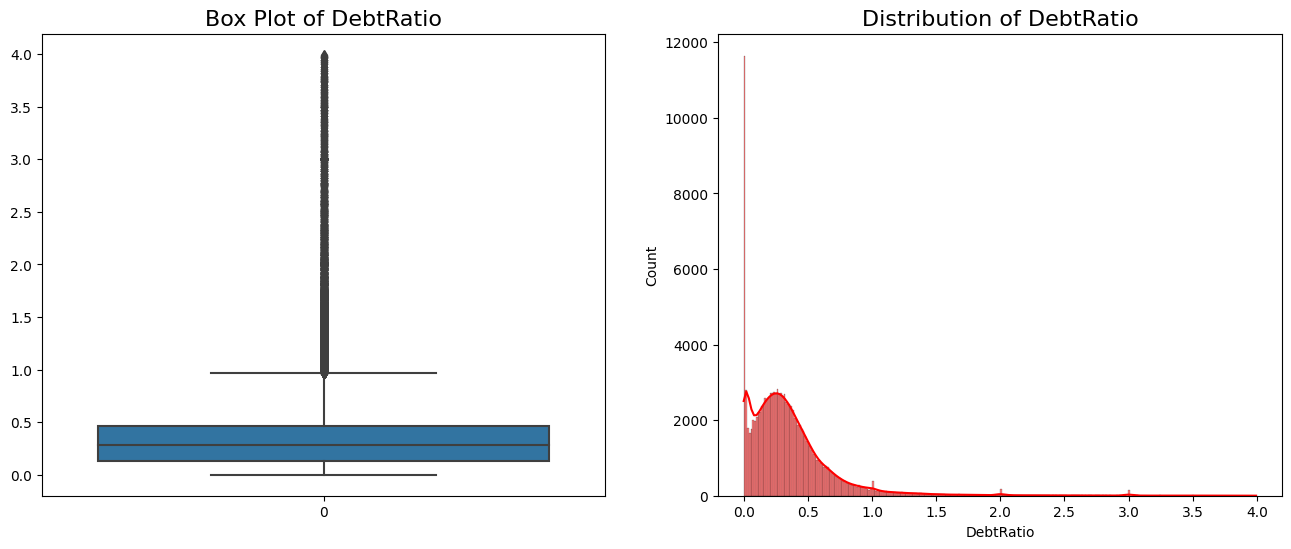

In [1032]:
fig, axes = plt.subplots(1,2,figsize = (16, 6))
sns.boxplot(df_clean['DebtRatio'], ax = axes[0])
axes[0].set_title('Box Plot of DebtRatio', size=16)
sns.histplot(df_clean['DebtRatio'], kde=True, color='red',ax=axes[1])
axes[1].set_title('Distribution of DebtRatio', size=16)

# Number of Dependents

In [1033]:
dep_desc = df_clean["NumberOfDependents"].describe().reset_index()
dep_desc.to_excel("output/dep_desc.xlsx")
dep_desc

,index,NumberOfDependents
0,count,119763.00000
1,mean,0.83825
2,std,1.14258
3,min,0.00000
4,25%,0.00000
5,50%,0.00000
6,75%,1.00000
7,max,20.00000


Text(0.5, 1.0, 'Distribution of NumberOfDependents')

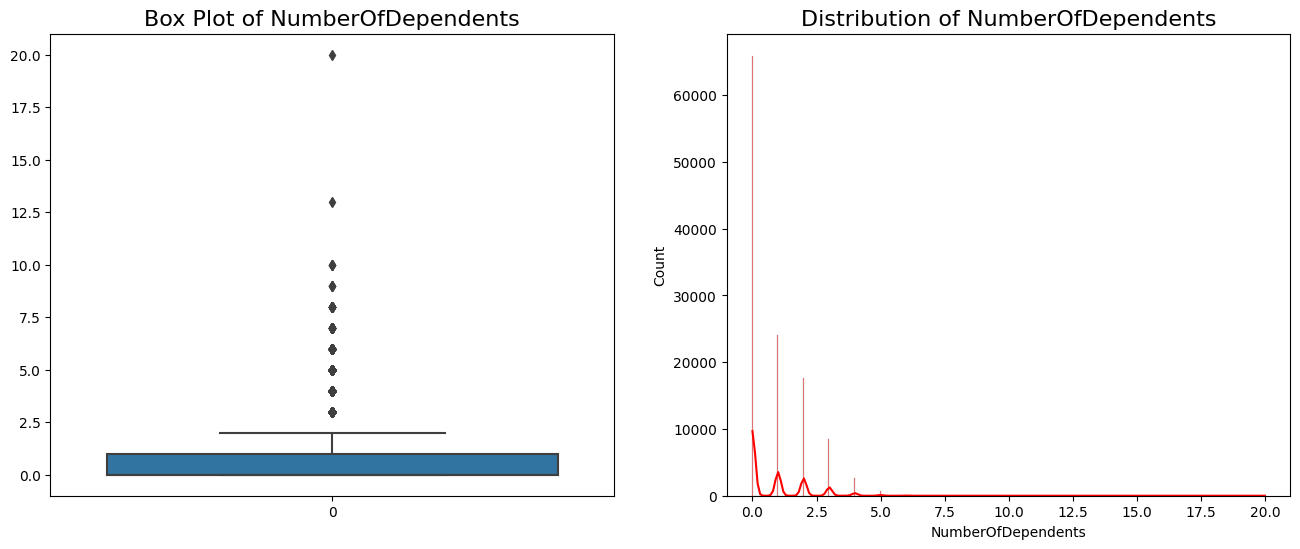

In [1034]:
fig, axes = plt.subplots(1,2,figsize = (16, 6))
sns.boxplot(df_clean['NumberOfDependents'], ax = axes[0])
axes[0].set_title('Box Plot of NumberOfDependents', size=16)
sns.histplot(df_clean['NumberOfDependents'], kde=True, color='red',ax=axes[1])
axes[1].set_title('Distribution of NumberOfDependents', size=16)

# Monthly Income

In [1035]:
MI_desc = df_clean["MonthlyIncome"].describe().reset_index()
MI_desc.to_excel("output/MI_desc.xlsx")
MI_desc

,index,MonthlyIncome
0,count,119763.00000
1,mean,6776.31145
2,std,14382.54084
3,min,0.00000
4,25%,3500.00000
5,50%,5483.00000
6,75%,8250.00000
7,max,3008750.00000


(array([-500000.,       0.,  500000., 1000000., 1500000., 2000000.,
        2500000., 3000000., 3500000.]),
 [Text(-500000.0, 0, '−0.5'),
  Text(0.0, 0, '0.0'),
  Text(500000.0, 0, '0.5'),
  Text(1000000.0, 0, '1.0'),
  Text(1500000.0, 0, '1.5'),
  Text(2000000.0, 0, '2.0'),
  Text(2500000.0, 0, '2.5'),
  Text(3000000.0, 0, '3.0'),
  Text(3500000.0, 0, '3.5')])

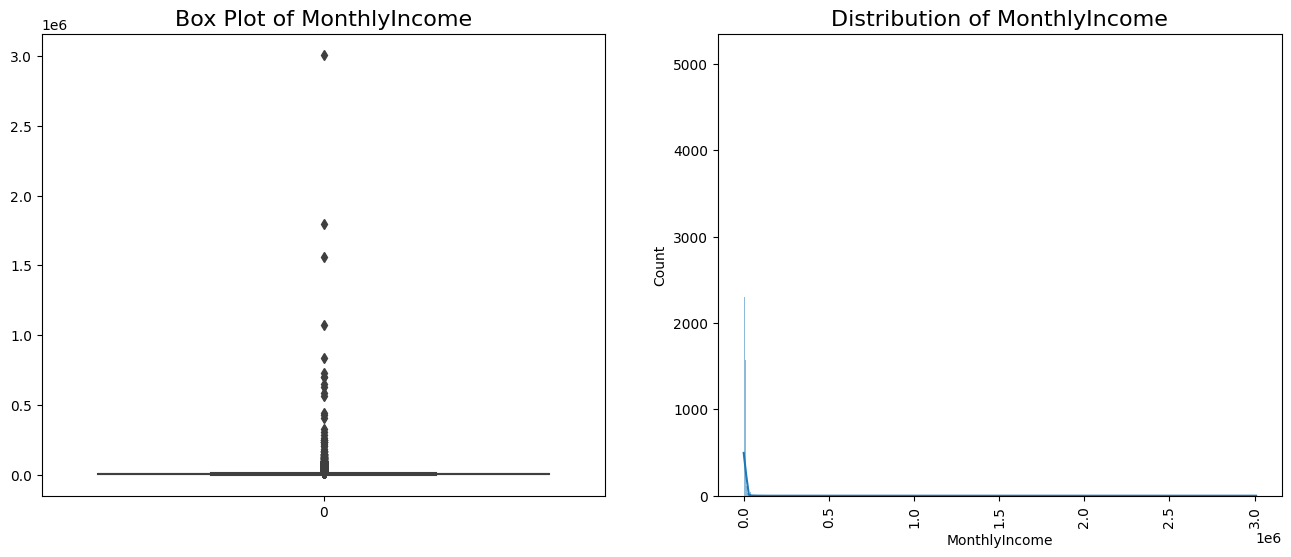

In [1036]:
fig, axes = plt.subplots(1,2,figsize = (16, 6))
sns.boxplot(df_clean['MonthlyIncome'], ax = axes[0])
axes[0].set_title('Box Plot of MonthlyIncome', size=16)
sns.histplot(df_clean['MonthlyIncome'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of MonthlyIncome', size=16)
plt.xticks(rotation=90)

# NumberOfOpenCreditLinesAndLoans

In [1037]:
OCLL_desc = df_clean["NumberOfOpenCreditLinesAndLoans"].describe().reset_index()
OCLL_desc.to_excel("output/OCLL_desc.xlsx")
OCLL_desc

,index,NumberOfOpenCreditLinesAndLoans
0,count,119763.00000
1,mean,8.66745
2,std,5.20220
3,min,0.00000
4,25%,5.00000
5,50%,8.00000
6,75%,11.00000
7,max,57.00000


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 [Text(-10.0, 0, '−10'),
  Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60')])

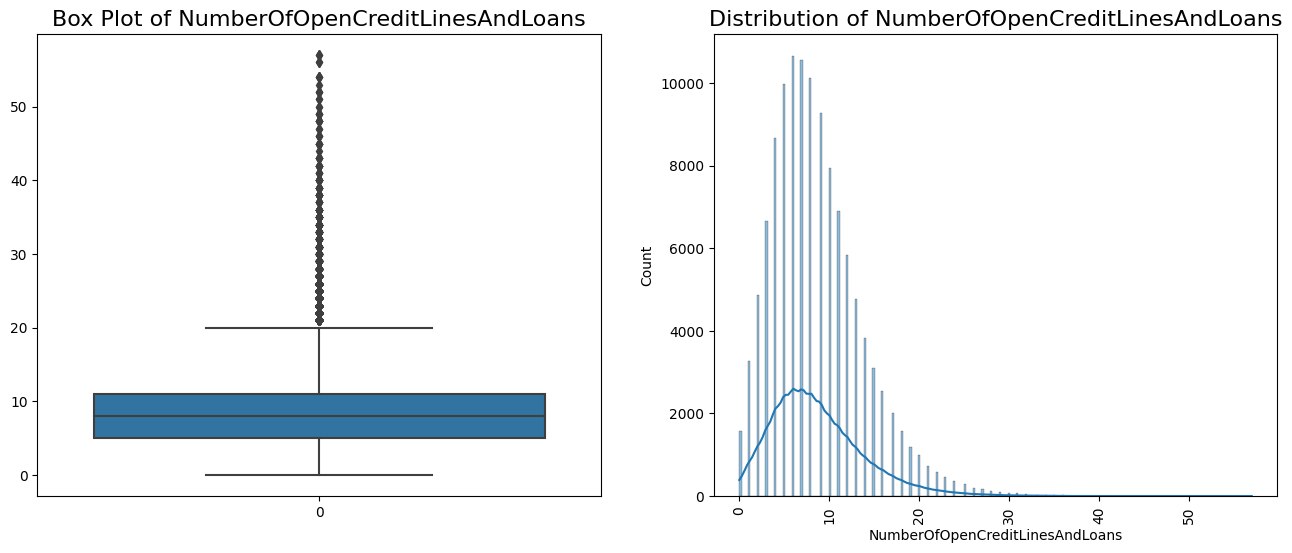

In [1038]:
# NumberOfOpenCreditLinesAndLoans
fig, axes = plt.subplots(1,2,figsize = (16, 6))
sns.boxplot(df_clean['NumberOfOpenCreditLinesAndLoans'], ax = axes[0])
axes[0].set_title('Box Plot of NumberOfOpenCreditLinesAndLoans', size=16)
sns.histplot(df_clean['NumberOfOpenCreditLinesAndLoans'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of NumberOfOpenCreditLinesAndLoans', size=16)
plt.xticks(rotation=90)

# NumberRealEstateLoansOrLines

In [1039]:
RELL_desc = df_clean["NumberRealEstateLoansOrLines"].describe().reset_index()
RELL_desc.to_excel("output/RELL_desc.xlsx")
RELL_desc

,index,NumberRealEstateLoansOrLines
0,count,119763.00000
1,mean,1.03673
2,std,1.13750
3,min,0.00000
4,25%,0.00000
5,50%,1.00000
6,75%,2.00000
7,max,32.00000


(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(-5.0, 0, '−5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35')])

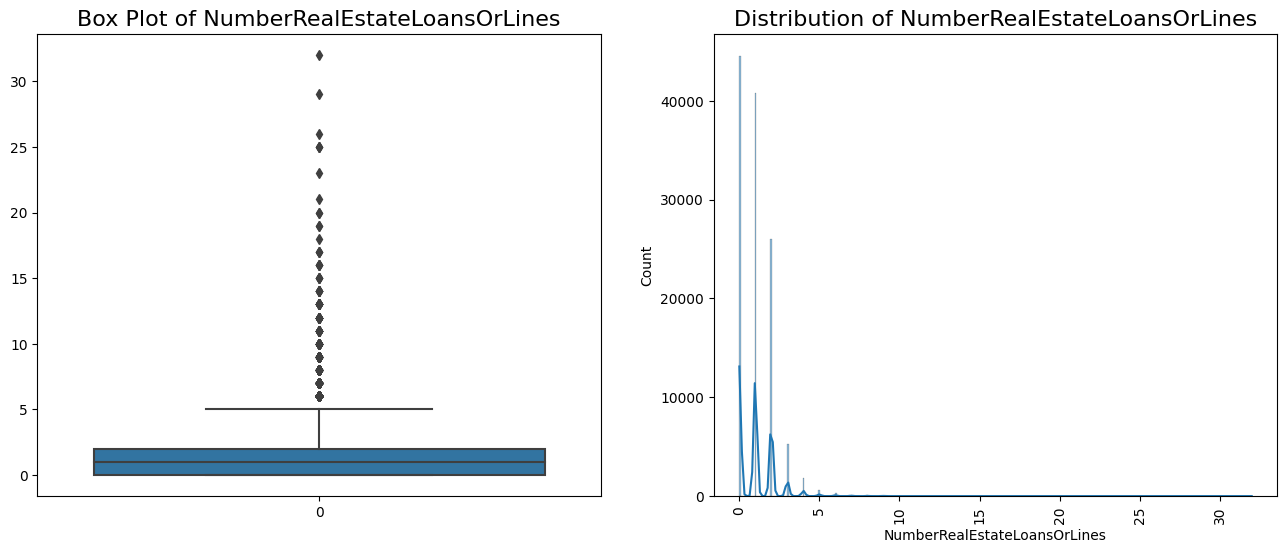

In [1040]:

fig, axes = plt.subplots(1,2,figsize = (16, 6))
sns.boxplot(df_clean['NumberRealEstateLoansOrLines'], ax = axes[0])
axes[0].set_title('Box Plot of NumberRealEstateLoansOrLines', size=16)
sns.histplot(df_clean['NumberRealEstateLoansOrLines'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of NumberRealEstateLoansOrLines', size=16)
plt.xticks(rotation=90)

# Focus on Target Variable

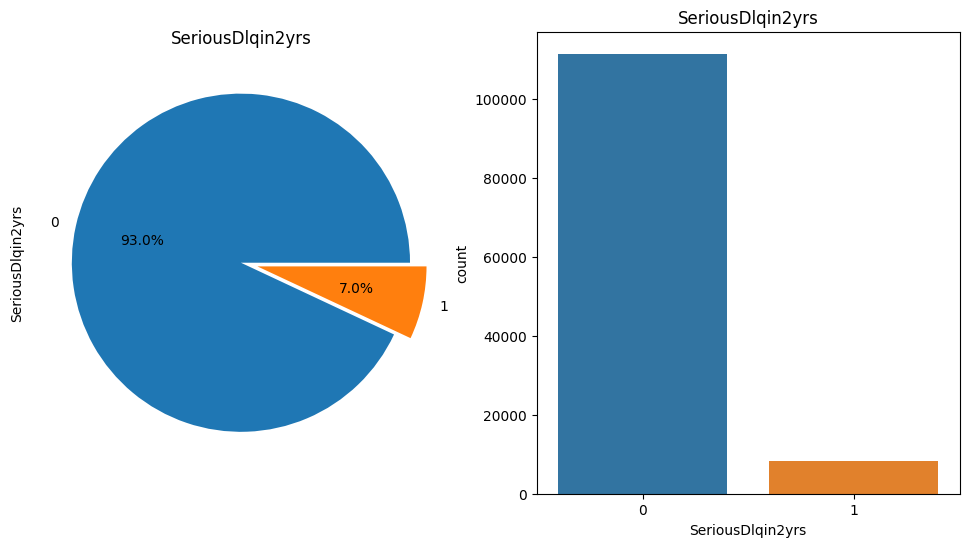

In [1041]:
fig, axes = plt.subplots(1,2,figsize=(12,6))
df['SeriousDlqin2yrs'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=axes[0])
axes[0].set_title('SeriousDlqin2yrs')
#ax[0].set_ylabel('')
sns.countplot(x = df['SeriousDlqin2yrs'])
axes[1].set_title('SeriousDlqin2yrs')
plt.show()

# Analyse Croisée

/var/folders/p6/3wdfvkxs655g3l5wdkh4kpv00000gn/T/ipykernel_47177/921173199.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_clean, x="RevolvingUtilizationOfUnsecuredLines", hue="SeriousDlqin2yrs", shade=True)


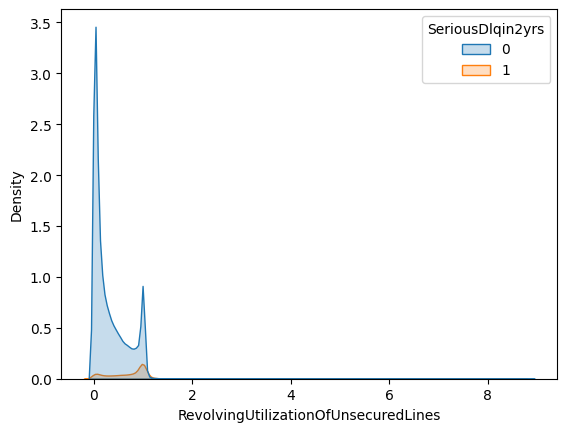

In [1042]:
# RevolvingUtilizationOfUnsecuredLines 

# Plot the density of a variable based on the modality of another variable
sns.kdeplot(data=df_clean, x="RevolvingUtilizationOfUnsecuredLines", hue="SeriousDlqin2yrs", shade=True)

# Show the plot
plt.show()

/var/folders/p6/3wdfvkxs655g3l5wdkh4kpv00000gn/T/ipykernel_47177/638797253.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_clean, x="DebtRatio", hue="SeriousDlqin2yrs", shade=True)


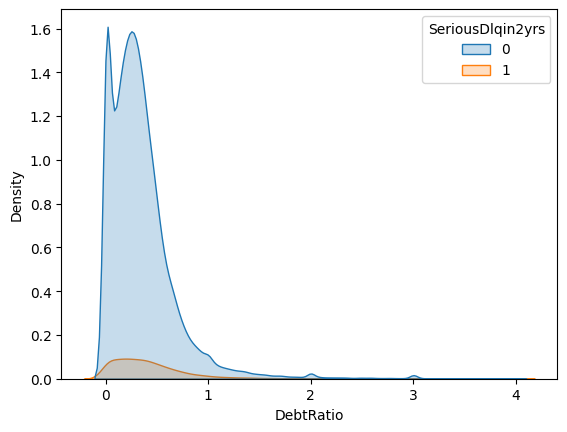

In [1043]:
#Debt Ratio

# Plot the density of a variable based on the modality of another variable
sns.kdeplot(data=df_clean, x="DebtRatio", hue="SeriousDlqin2yrs", shade=True)

# Show the plot
plt.show()

/var/folders/p6/3wdfvkxs655g3l5wdkh4kpv00000gn/T/ipykernel_47177/2562610232.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_clean, x="MonthlyIncome", hue="SeriousDlqin2yrs", shade=True)


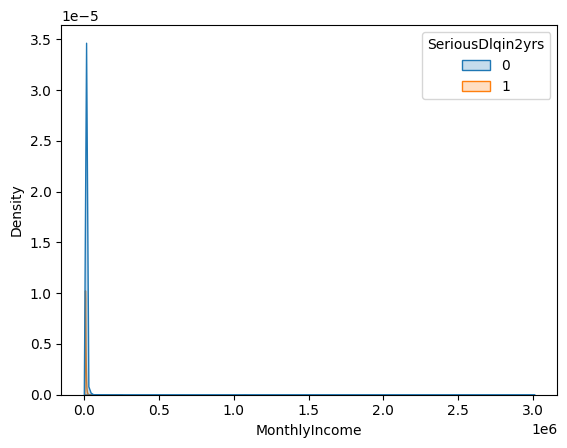

In [1044]:
#Monthly Income
# Plot the density of a variable based on the modality of another variable
sns.kdeplot(data=df_clean, x="MonthlyIncome", hue="SeriousDlqin2yrs", shade=True)

# Show the plot
plt.show()

/var/folders/p6/3wdfvkxs655g3l5wdkh4kpv00000gn/T/ipykernel_47177/664962130.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_clean, x="NumberOfDependents", hue="SeriousDlqin2yrs", shade=True)


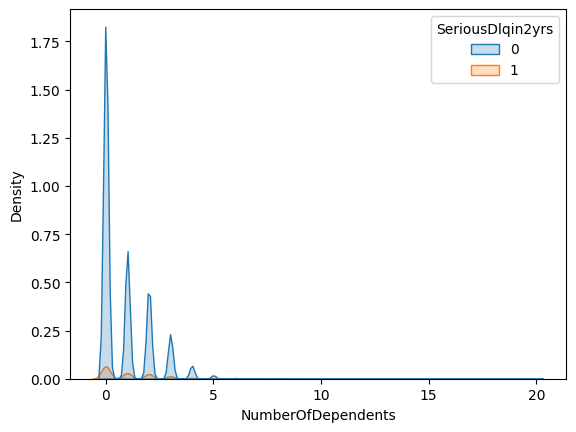

In [1045]:
#Number of Dependents
# Plot the density of a variable based on the modality of another variable
sns.kdeplot(data=df_clean, x="NumberOfDependents", hue="SeriousDlqin2yrs", shade=True)

# Show the plot
plt.show()

/var/folders/p6/3wdfvkxs655g3l5wdkh4kpv00000gn/T/ipykernel_47177/2083845384.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_clean, x="NumberOfOpenCreditLinesAndLoans", hue="SeriousDlqin2yrs", shade=True)


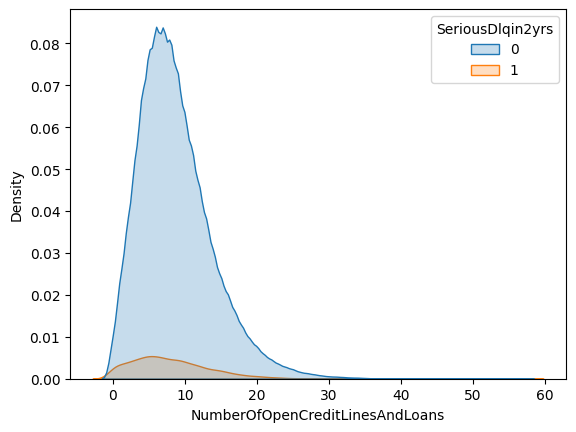

In [1046]:
# NumberOfOpenCreditLinesAndLoans

# Plot the density of a variable based on the modality of another variable
sns.kdeplot(data=df_clean, x="NumberOfOpenCreditLinesAndLoans", hue="SeriousDlqin2yrs", shade=True)

# Show the plot
plt.show()


/var/folders/p6/3wdfvkxs655g3l5wdkh4kpv00000gn/T/ipykernel_47177/3332735313.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_clean, x="NumberRealEstateLoansOrLines", hue="SeriousDlqin2yrs", shade=True)


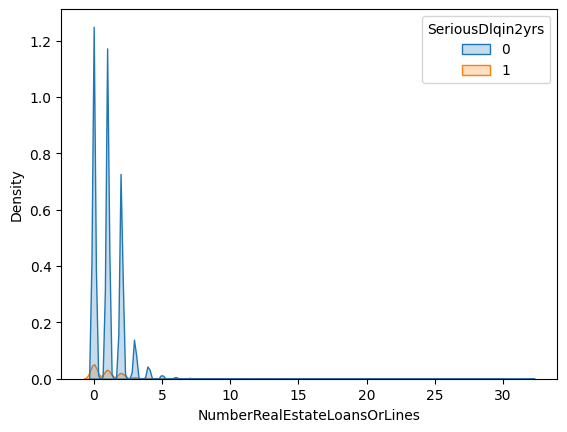

In [1047]:
# NumberRealEstateLoansOrLines

# Plot the density of a variable based on the modality of another variable
sns.kdeplot(data=df_clean, x="NumberRealEstateLoansOrLines", hue="SeriousDlqin2yrs", shade=True)

# Show the plot
plt.show()

/var/folders/p6/3wdfvkxs655g3l5wdkh4kpv00000gn/T/ipykernel_47177/1677327504.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_clean, x="NumberOfTime30-59DaysPastDueNotWorse", hue="SeriousDlqin2yrs", shade=True)


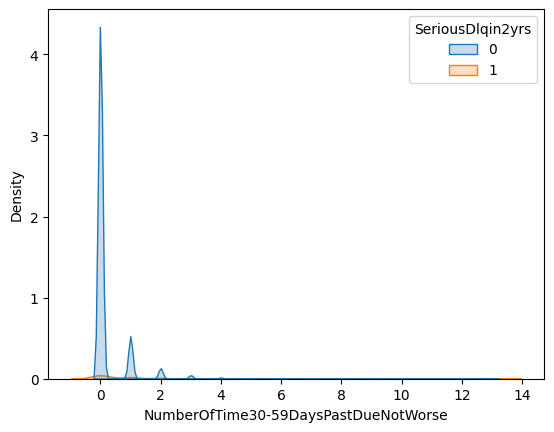

In [1048]:
# NumberOfTime30-59DaysPastDueNotWorse

# Plot the density of a variable based on the modality of another variable
sns.kdeplot(data=df_clean, x="NumberOfTime30-59DaysPastDueNotWorse", hue="SeriousDlqin2yrs", shade=True)

# Show the plot
plt.show()

# Correlation

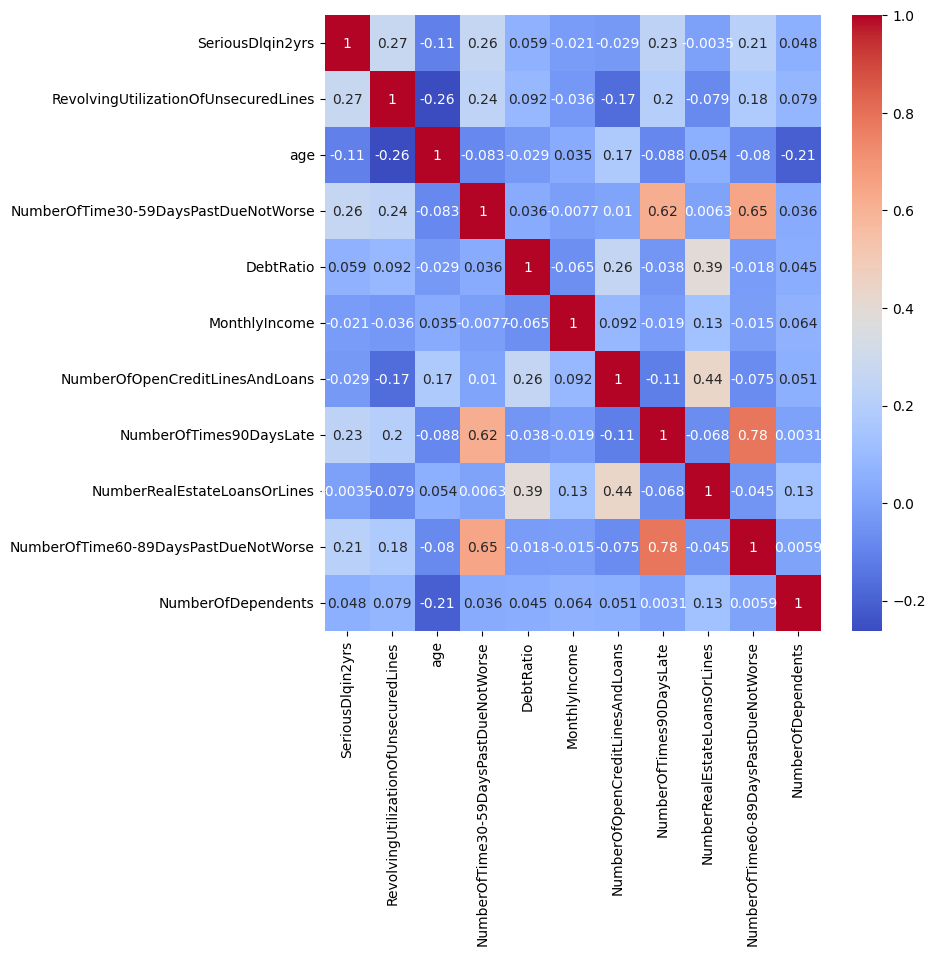

In [1049]:
corr_matrix = df_clean.corr()
# Create a figure object and set the size
fig, ax = plt.subplots(figsize=(8,8))

# Use Seaborn's heatmap function to create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)

# Show the plot
plt.show()

# Clustering

In [1050]:
# Détermination du nombre de clusters optimal pour chaque variable
n_clusters = {}
for col in df_clean.columns:
    X = df_clean[[col]].dropna()
    inertias = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=0, n_init=10).fit(X)
        inertias.append(kmeans.inertia_)
    diff = [inertias[i] - inertias[i+1] for i in range(len(inertias)-1)]
    n_clusters[col] = diff.index(max(diff)) + 2

# Affichage des résultats dans un tableau
results_df = pd.DataFrame({'Variable': list(n_clusters.keys()), 'Nb Classes Optimal': list(n_clusters.values())})
results_df

/var/folders/p6/3wdfvkxs655g3l5wdkh4kpv00000gn/T/ipykernel_47177/1372633256.py:7: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, random_state=0, n_init=10).fit(X)
/var/folders/p6/3wdfvkxs655g3l5wdkh4kpv00000gn/T/ipykernel_47177/1372633256.py:7: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, random_state=0, n_init=10).fit(X)
/var/folders/p6/3wdfvkxs655g3l5wdkh4kpv00000gn/T/ipykernel_47177/1372633256.py:7: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, random_state=0, n_init=10).fit(X)
/var/folders/p6/3wdfvkxs655g3l5wdkh4kpv00000gn/T/ipykernel_47177/1372633256.py:7: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly 

,Variable,Nb Classes Optimal
0,SeriousDlqin2yrs,2
1,RevolvingUtilizationOfUnsecuredLines,2
2,age,2
3,NumberOfTime30-59DaysPastDueNotWorse,2
4,DebtRatio,2
5,MonthlyIncome,2
6,NumberOfOpenCreditLinesAndLoans,2
7,NumberOfTimes90DaysLate,2
8,NumberRealEstateLoansOrLines,2
9,NumberOfTime60-89DaysPastDueNotWorse,2


Le warning indique un problème de convergence.

La variable diff contient la différence entre l'inertie pour chaque nombre de clusters (k) et l'inertie pour k+1. Pour trouver le nombre de clusters optimal, nous cherchons le point où l'ajout de clusters ne contribue plus de manière significative à la réduction de l'inertie. Cela se produit lorsque la différence entre l'inertie pour k et k+1 est la plus grande.
Cependant, si la différence est 0 pour tous les nombres de clusters, cela signifie qu'il n'y a pas de point où l'ajout de clusters ne contribue plus de manière significative à la réduction de l'inertie. Dans ce cas, nous pouvons choisir un nombre de clusters arbitraire, ou utiliser une autre méthode pour déterminer le nombre optimal de clusters.
On trouve alors 2 pour toutes les variables (la méthode est-elle vraiment optimale ?) POur vérifier cela on va regarder graphiquement le nombre de cluster optimal

On va appliquer cette méthode elbow à chacune de nos variables

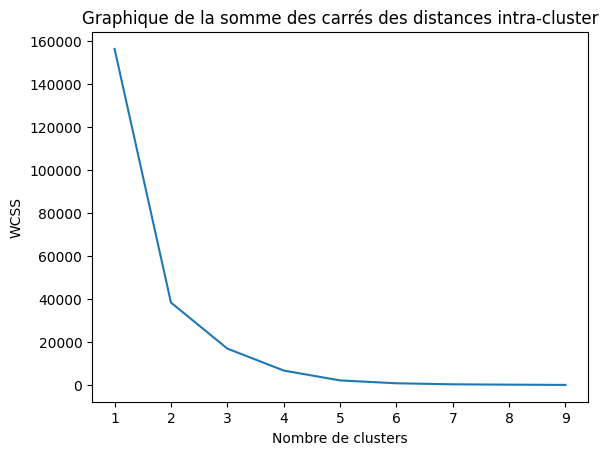

In [1051]:
# calculer le WCSS pour différents nombres de clusters
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# afficher le graphique de WCSS
plt.plot(range(1, 10), wcss)
plt.title('Graphique de la somme des carrés des distances intra-cluster')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.show()

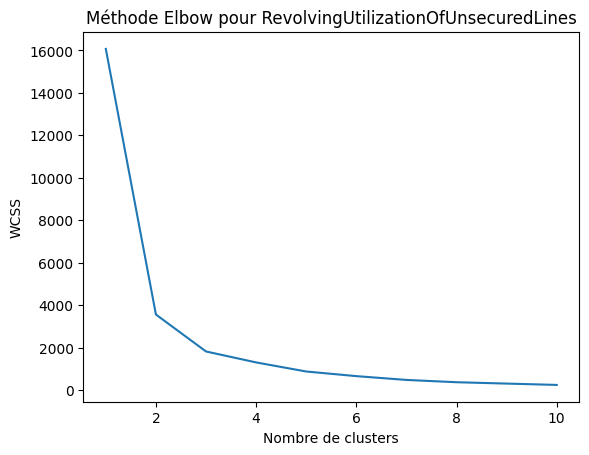

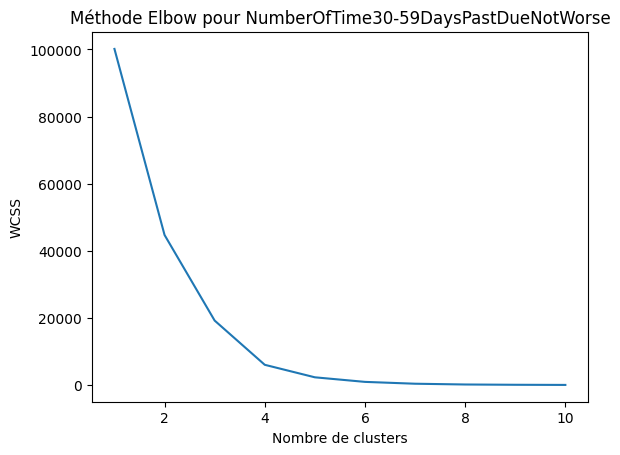

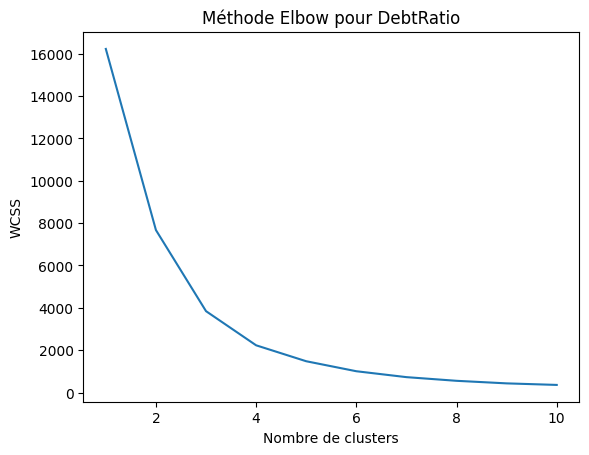

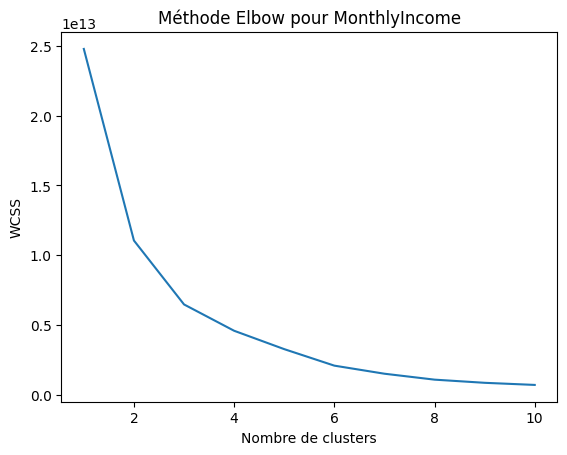

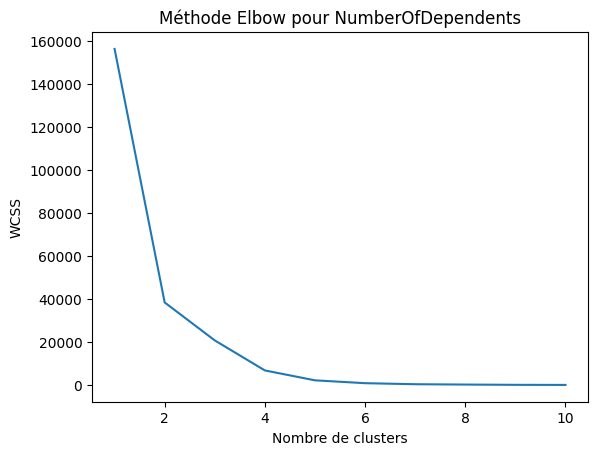

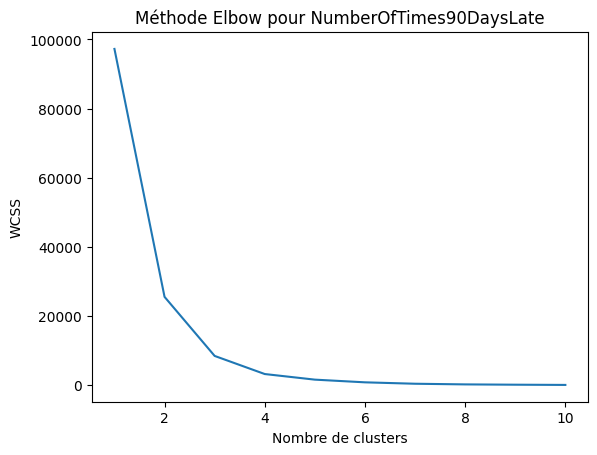

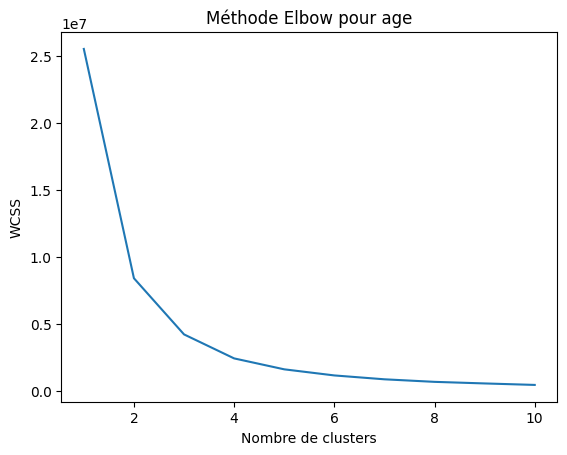

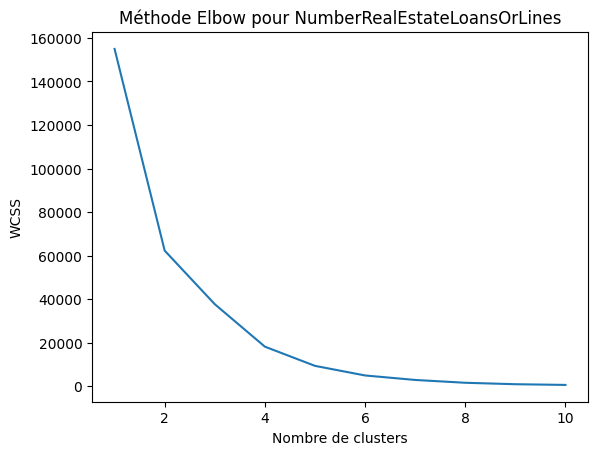

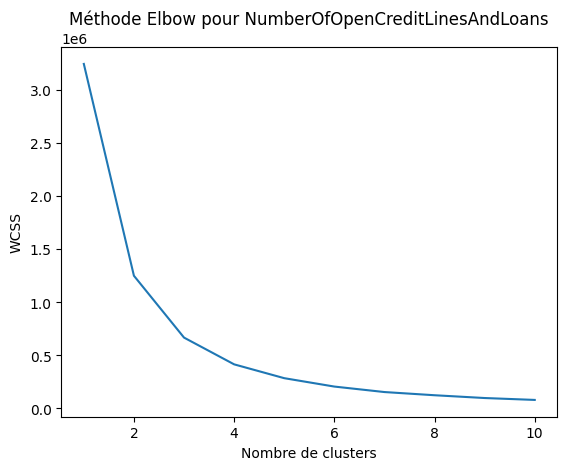

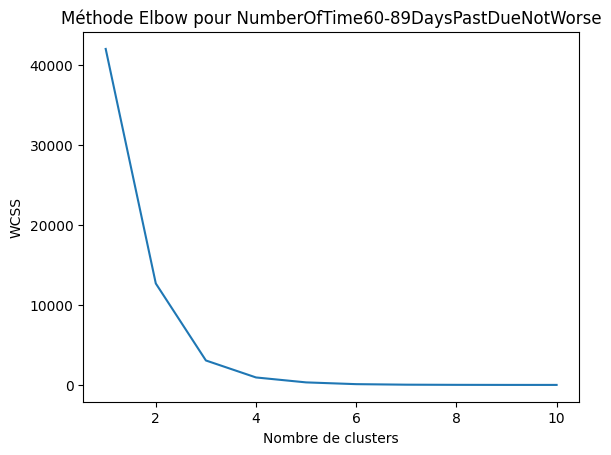

In [1052]:
# Créer une liste des variables à utiliser
variables = ['RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfDependents', 'NumberOfTimes90DaysLate', 'age', 'NumberRealEstateLoansOrLines', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTime60-89DaysPastDueNotWorse']

# Définir le nombre maximal de clusters
max_clusters = 10

# Boucle for pour chaque variable
for var in variables:
    # Créer un sous-ensemble de données avec la variable en question
    X = df_clean[var].values.reshape(-1, 1)
    
    # Initialiser une liste pour stocker les valeurs de WCSS
    wcss = []
    
    # Boucle for pour chaque nombre de clusters
    for i in range(1, max_clusters+1):
        # Initialiser l'objet KMeans avec le nombre de clusters actuel
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
        
        # Ajuster le modèle aux données et obtenir les valeurs de WCSS
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    
    # Tracer la courbe de la méthode elbow pour la variable en question
    plt.plot(range(1, max_clusters+1), wcss)
    plt.title("Méthode Elbow pour {}".format(var))
    plt.xlabel("Nombre de clusters")
    plt.ylabel("WCSS")
    plt.show()

In [1053]:
def segment(df, variable, nb_class):
    #  bornes  classes avec la fonction qcut
    df['class_' + variable] = pd.qcut(df[variable], q=nb_class, precision=2, duplicates='drop', labels=False)
    df['class_' + variable] = df['class_' + variable] + 1

    # Homogénéisation en effectifs
    seg_df = df.groupby('class_' + variable).apply(lambda x: x.sample(df['class_' + variable].value_counts().min()))
    return seg_df


#Classification de l'ensemble de nos variables en différents nombres de classes à l'aide de la méthode du coude
data_class = segment(df_clean, 'RevolvingUtilizationOfUnsecuredLines',2)
data_class = segment(data_class, 'DebtRatio',4)
data_class = segment(data_class, 'MonthlyIncome',3)
data_class = segment(data_class, 'age',3)
data_class = segment(data_class, 'NumberRealEstateLoansOrLines',4)
data_class = segment(data_class, 'NumberOfOpenCreditLinesAndLoans',3)
data_class = segment(data_class, 'NumberOfTime60-89DaysPastDueNotWorse',2)
data_class = segment(data_class, 'NumberOfTimes90DaysLate',2)
data_class = segment(data_class, 'NumberOfTime30-59DaysPastDueNotWorse',2)
data_class = segment(data_class, 'NumberOfDependents',2)
data_class.loc[data_class['NumberOfTime30-59DaysPastDueNotWorse'] != 0, 'class_NumberOfTime30-59DaysPastDueNotWorse'] = 2
data_class.loc[data_class['NumberOfTimes90DaysLate'] != 0, 'class_NumberOfTimes90DaysLate'] = 2
data_class.loc[data_class['NumberOfTime60-89DaysPastDueNotWorse'] != 0, 'class_NumberOfTime60-89DaysPastDueNotWorse'] = 2
data_class

SeriousDlqin2yrs  \
class_NumberOfDependents class_NumberOfTime30-59DaysPastDueNotWorse class_NumberOfTimes90DaysLate class_NumberOfTime60-89DaysPastDueNotWorse class_NumberOfOpenCreditLinesAndLoans class_NumberRealEstateLoansOrLines class_age class_MonthlyIncome class_DebtRatio class_RevolvingUtilizationOfUnsecuredLines                            
1                        1                                          1                             1                                          2                                     3                                  1         3                   3               1                                          116948                 0   
                                                                                                                                             1                                     1                                  2         1                   3               2                                          74692                  0   
                                                                                                                                             3                                     2                                  3         2                   3               1                                          109504                 0   
                                                                                                                                             1                                     2                                  3         1                   3               1                                          96837                  0   
                                                                                                                                             3                                     3                                  1         3                   4               1                                          58758                  0   
...                                                                                                                                                                                                                                                                                                                                 ...   
2                        1                                          1                             1                                          3                                     3                                  3         3                   4               2                                          11601                  0   
                                                                                                                                             2                                     1                                  1         2                   4               2                                          140789                 0   
                                                                                                                                             1                                     3                                  2         2                   4               1                                          139325                 1   
                                                                                                                                                                                   2                                  1         1                   4               2                                          52150                  0   
                                                                                                                                             2                                     3                                  2         3                   3               1                                          100247                 0   

       

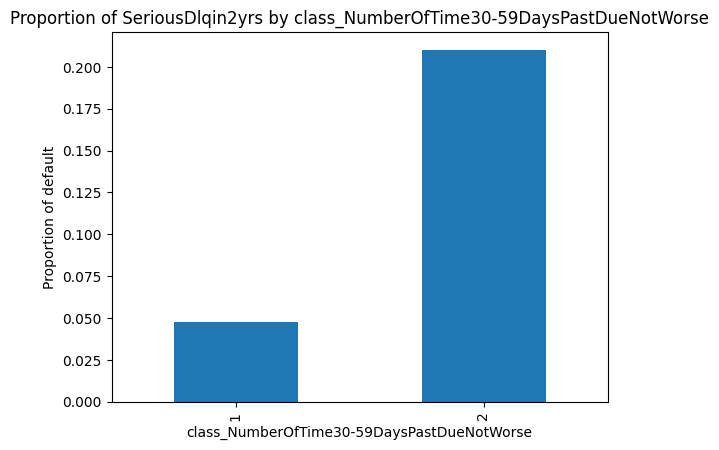

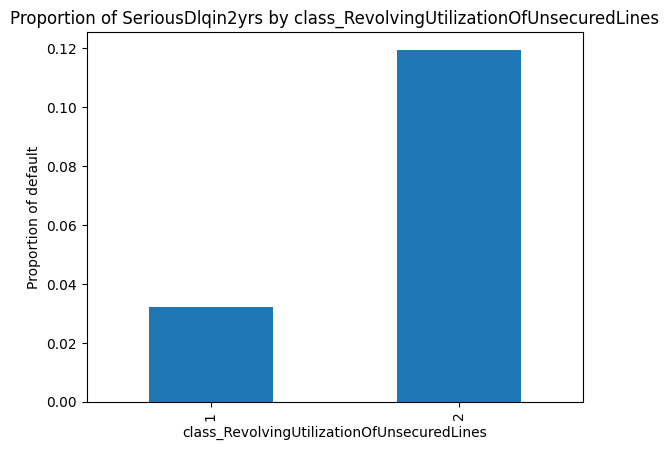

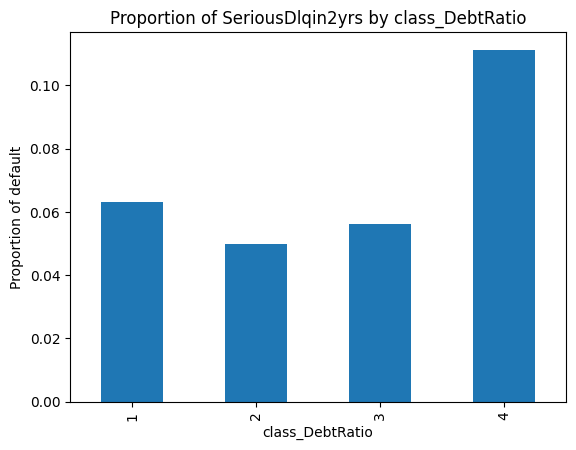

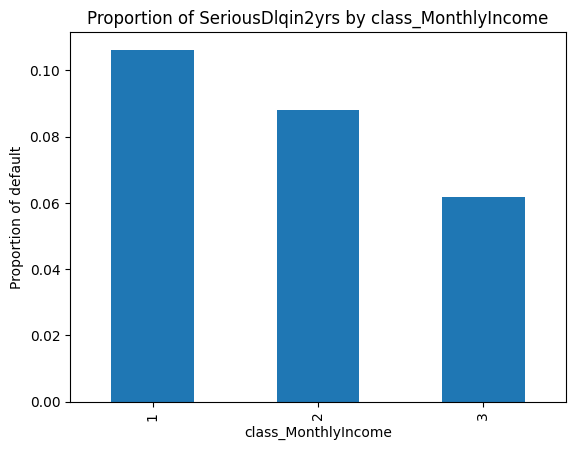

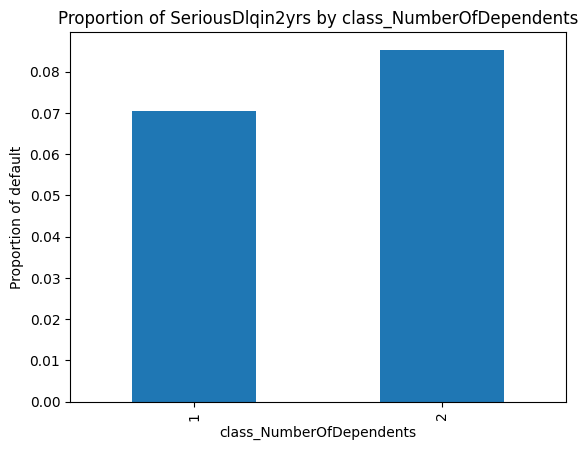

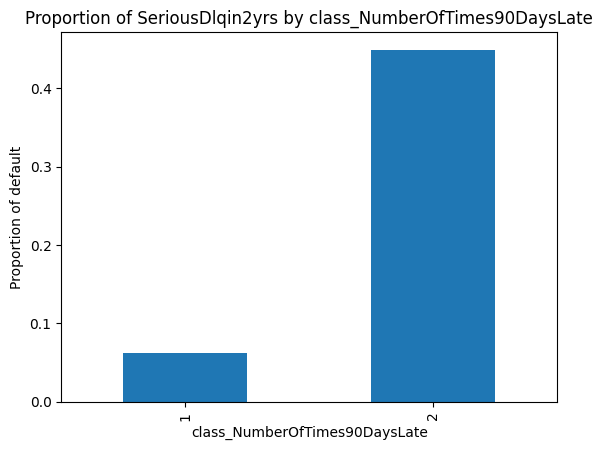

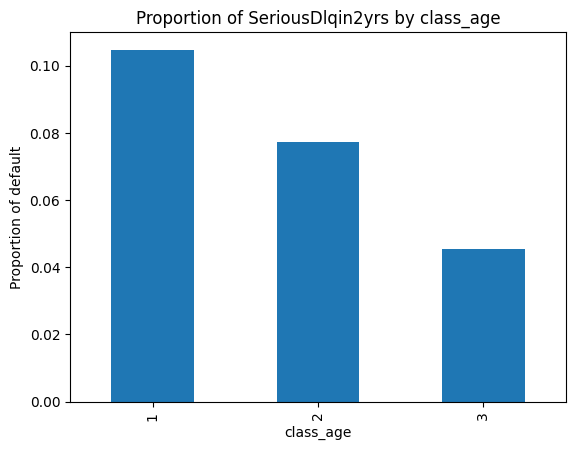

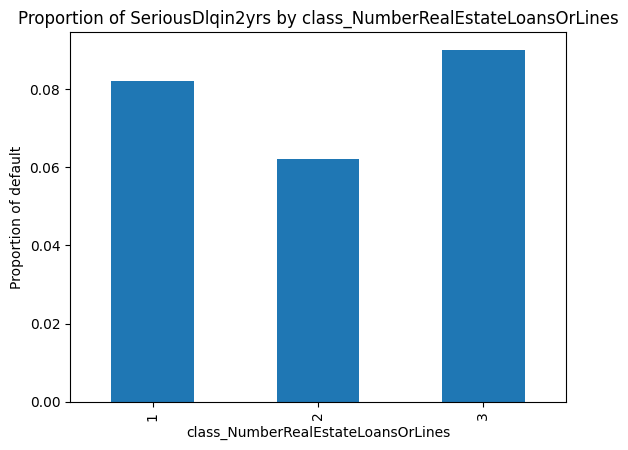

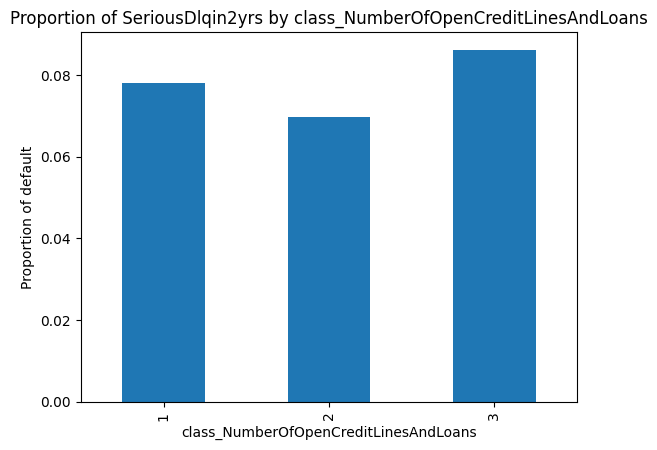

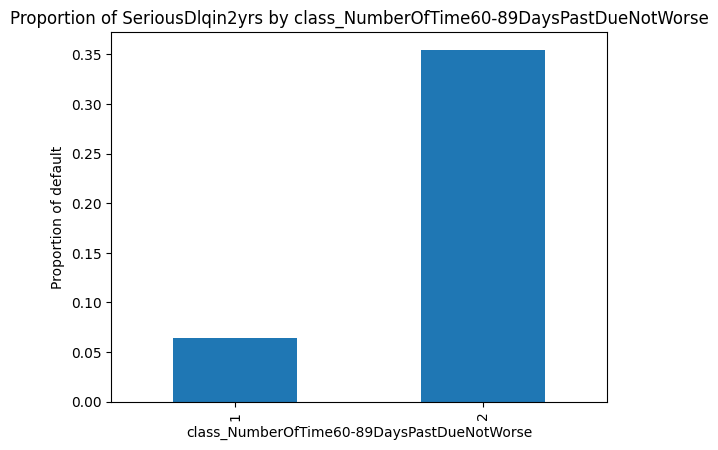

In [1054]:

# Select variables to analyz
classe = ['class_NumberOfTime30-59DaysPastDueNotWorse', 'class_RevolvingUtilizationOfUnsecuredLines', 'class_DebtRatio', 'class_MonthlyIncome', 'class_NumberOfDependents','class_NumberOfTimes90DaysLate', 'class_age', 'class_NumberRealEstateLoansOrLines', 'class_NumberOfOpenCreditLinesAndLoans', 'class_NumberOfTime60-89DaysPastDueNotWorse']

# Loop through variables and create bar plots
for var in classe:
    # Create a contingency table of the two variables
    data_class1 = pd.crosstab(data_class[var], data_class['SeriousDlqin2yrs'])
    
    # Calculate the proportion of SeriousDlqin2yrs by each class of var
    prop_default = data_class1[1] / data_class1.sum(axis=1)
    
    # Plot the results as a bar chart
    prop_default.plot(kind='bar')
    plt.xlabel(var)
    plt.ylabel('Proportion of default')
    plt.title(f'Proportion of SeriousDlqin2yrs by {var}')
    plt.show()

# Machine Learning

In [1055]:
X = df_clean.drop("SeriousDlqin2yrs", axis = 1)
y = df_clean["SeriousDlqin2yrs"].to_numpy()
X

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,class_RevolvingUtilizationOfUnsecuredLines
0,0.76613,45,2,0.80298,9120.00000,13,0,6,0,2.00000,2
1,0.95715,40,0,0.12188,2600.00000,4,0,0,0,1.00000,2
2,0.65818,38,1,0.08511,3042.00000,2,1,0,0,0.00000,2
3,0.23381,30,0,0.03605,3300.00000,5,0,0,0,0.00000,2
4,0.90724,49,1,0.02493,63588.00000,7,0,1,0,0.00000,2
...,...,...,...,...,...,...,...,...,...,...,...
149994,0.38574,50,0,0.40429,3400.00000,7,0,0,0,0.00000,2
149995,0.04067,74,0,0.22513,2100.00000,4,0,1,0,0.00000,1
149996,0.29975,44,0,0.71656,5584.00000,4,0,1,0,2.00000,2
149998,0.00000,30,0,0.00000,5716.00000,4,0,0,0,0.00000,1


# Data Normalization

In [1056]:
from sklearn.preprocessing import MinMaxScaler

In [1057]:
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)
X_norm

array([[0.08654987, 0.42857143, 0.15384615, ..., 0.        , 0.1       ,
        1.        ],
       [0.10813003, 0.38095238, 0.        , ..., 0.        , 0.05      ,
        1.        ],
       [0.07435508, 0.36190476, 0.07692308, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.03386242, 0.41904762, 0.        , ..., 0.        , 0.1       ,
        1.        ],
       [0.        , 0.28571429, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.09605707, 0.60952381, 0.        , ..., 0.        , 0.        ,
        1.        ]])

# Split dataset

In [1058]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2,  random_state=42)

In [1059]:
print("X_train dimension : ", X_train.shape)
print("y_train dimension : ", y_train.shape)
print("X_test dimension : ", X_test.shape)
print("y_test dimension : ", y_test.shape)

X_train dimension :  (95810, 11)
y_train dimension :  (95810,)
X_test dimension :  (23953, 11)
y_test dimension :  (23953,)


# Initiate KFold

In [1060]:
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# Compute Class Weights

In [1061]:
from sklearn.utils import class_weight

weights = class_weight.compute_class_weight(class_weight='balanced', classes= np.unique(y_train), y= y_train)

weight_dict = {np.unique(y)[i]: weights[i] for i in range(len(np.unique(y)))}
weight_dict

{0: 0.5373166135762035, 1: 7.199428914938383}

# Initiate our Scorer

In [1062]:
from sklearn.metrics import f1_score, accuracy_score, auc, make_scorer, recall_score, precision_score

# Store our futur results in a dataframe

In [1063]:
model_result = pd.DataFrame(columns= ["Model", "Accuracy", "Recall", "Precision", "F1_score", "AUC"])

# Logistic Regression 

                Model  Accuracy  Recall  Precision  F1_score     AUC
0  LogisticRegression   0.93099 0.06886    0.62234   0.54404 0.82892


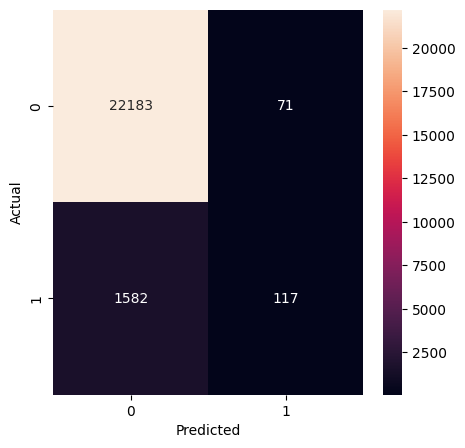

In [1064]:
#Baseline 

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_bs = lr_model.predict(X_test)
y_probs_bs = lr_model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs_bs, pos_label = 1)
score = auc(fpr, tpr)

#Store the performance in a df
result = pd.DataFrame({"Model" : ["LogisticRegression"],
                       "Accuracy" : [accuracy_score(y_test, y_pred_bs)],
                       "Recall" : [recall_score(y_test, y_pred_bs)],
                       "Precision" : [precision_score(y_test, y_pred_bs)],
                       "F1_score" : [f1_score(y_test, y_pred_bs, average="macro")],
                       "AUC" : [score]}
                       )

model_result = pd.concat([model_result, result])
print(model_result)

# making the confusion matrix
cm = confusion_matrix(y_test, y_pred_bs)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



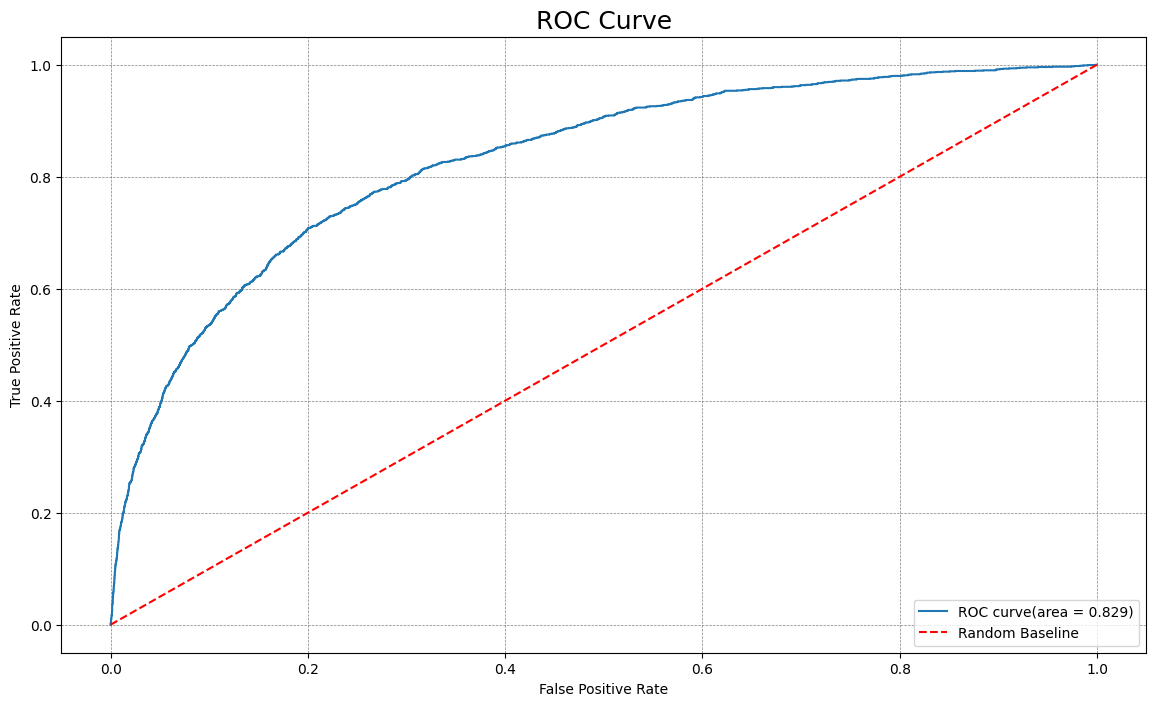

In [1065]:
plt.figure(figsize = (14, 8))
plt.plot(fpr, tpr, label="ROC curve(area = %0.3f)" % score)
plt.plot([0, 1], [0, 1], color="red",label="Random Baseline", linestyle="--")
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve", size=18)
plt.legend(loc="lower right")

In [1066]:
# Obtain coefficient values and feature names
coef = lr_model.coef_.ravel()
feature_names = X.columns

# Create a pandas dataframe to display the results
coef_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coef})
coef_df = coef_df.sort_values("Coefficient", ascending=False)

# Print the table of coefficient values
print("Table of Coefficient Values:\n")
coef_df

Table of Coefficient Values:



,Feature,Coefficient
0,RevolvingUtilizationOfUnsecuredLines,13.79931
2,NumberOfTime30-59DaysPastDueNotWorse,4.47353
6,NumberOfTimes90DaysLate,3.78458
3,DebtRatio,1.53538
8,NumberOfTime60-89DaysPastDueNotWorse,1.31470
9,NumberOfDependents,1.30513
7,NumberRealEstateLoansOrLines,0.69353
5,NumberOfOpenCreditLinesAndLoans,0.64703
10,class_RevolvingUtilizationOfUnsecuredLines,0.43190
4,MonthlyIncome,-0.88489


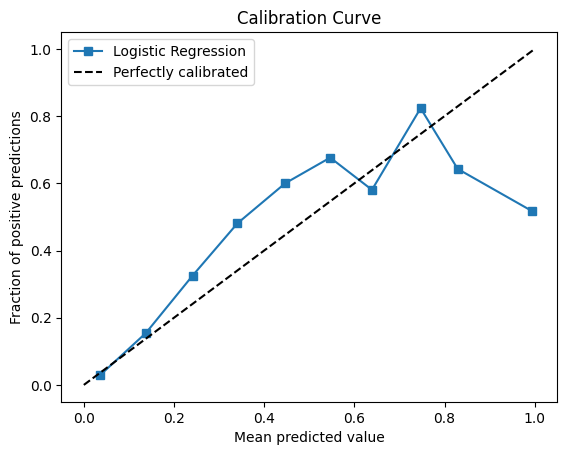

In [1067]:
# Calculate the fraction of positive predictions and the mean predicted value
frac_pos, mean_pred = calibration_curve(y_test, y_probs_bs, n_bins=10)

# Plot the calibration curve
plt.plot(mean_pred, frac_pos, 's-', label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean predicted value')
plt.ylabel('Fraction of positive predictions')
plt.title("Calibration Curve")
plt.legend()
plt.show()

Best parameters:  {'C': 100, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'newton-cg'}

Prédiction :

                          Model  Accuracy  Recall  Precision  F1_score     AUC
0            LogisticRegression   0.93099 0.06886    0.62234   0.54404 0.82892
0  Optimized_LogisticRegression   0.78808 0.74220    0.21377   0.60300 0.85033


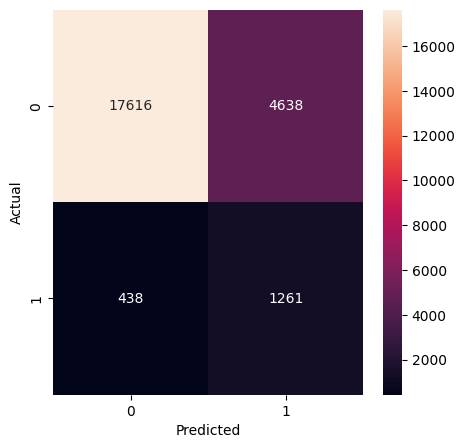

In [1068]:
#Best Model

param_grid = {'penalty': [ 'l2'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'class_weight': [None, 'balanced', weight_dict],
              'solver' : ['newton-cg']}

lr_model = LogisticRegression(max_iter = 1000)

lr_model_gr = GridSearchCV(lr_model, param_grid=param_grid, cv=cv,
                           scoring= "roc_auc", refit= "roc_auc", n_jobs=-1, error_score= 'raise')

lr_model_gr.fit(X_train, y_train)

# get the best parameters and the best score

# print the best parameters and scores
print("Best parameters: ", lr_model_gr.best_params_)

print("\nPrédiction :\n")
y_pred = lr_model_gr.predict(X_test)
y_probs = lr_model_gr.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label = 1)
score = auc(fpr, tpr)

#Store the performance in a df
result = pd.DataFrame({"Model" : ["Optimized_LogisticRegression"],
                       "Accuracy" : [accuracy_score(y_test, y_pred)],
                       "Recall" : [recall_score(y_test, y_pred)],
                       "Precision" : [precision_score(y_test, y_pred)],
                       "F1_score" : [f1_score(y_test, y_pred, average="macro")],
                       "AUC" : [score]}
                       )

model_result = pd.concat([model_result, result])
print(model_result)

# making the confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

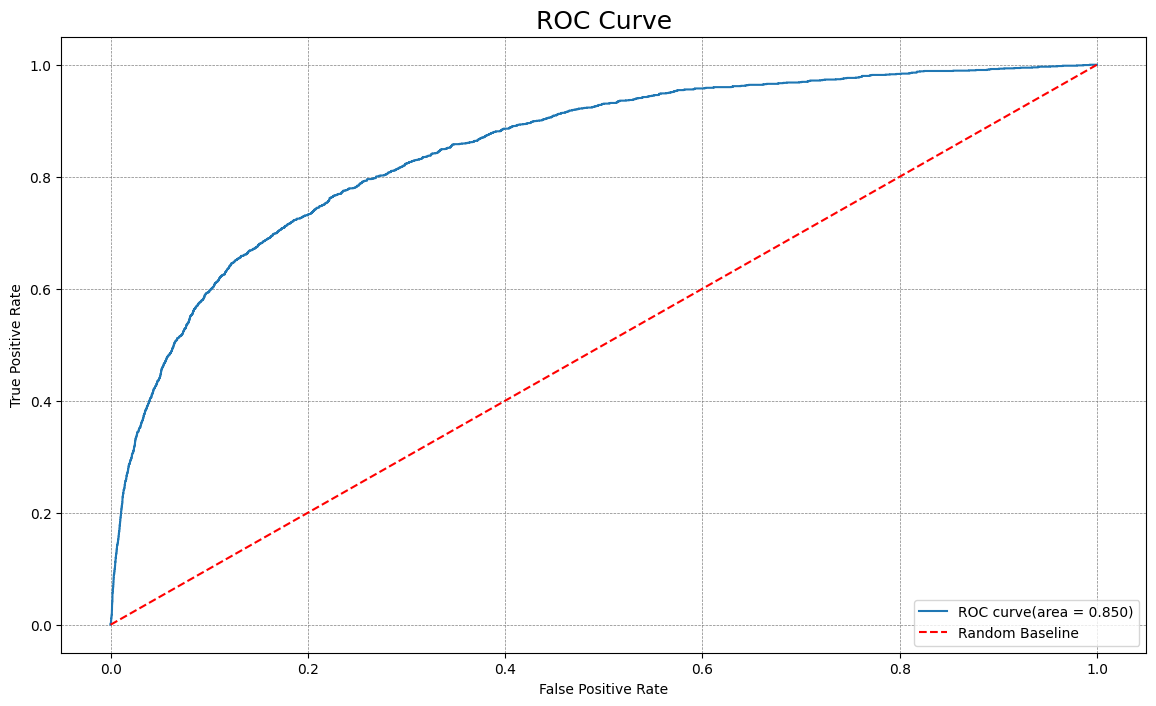

In [1069]:
plt.figure(figsize = (14, 8))
plt.plot(fpr, tpr, label="ROC curve(area = %0.3f)" % score)
plt.plot([0, 1], [0, 1], color="red",label="Random Baseline", linestyle="--")
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve", size=18)
plt.legend(loc="lower right")

In [1070]:
# Obtain coefficient values and feature names
coef = lr_model_gr.best_estimator_.coef_.ravel()
feature_names = X.columns

# Create a pandas dataframe to display the results
coef_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coef})
coef_df = coef_df.sort_values("Coefficient", ascending=False)

# Print the table of coefficient values
print("Table of Coefficient Values:\n")
coef_df

Table of Coefficient Values:



,Feature,Coefficient
0,RevolvingUtilizationOfUnsecuredLines,16.79072
6,NumberOfTimes90DaysLate,12.08590
8,NumberOfTime60-89DaysPastDueNotWorse,7.25902
2,NumberOfTime30-59DaysPastDueNotWorse,6.78926
7,NumberRealEstateLoansOrLines,2.12707
5,NumberOfOpenCreditLinesAndLoans,1.57374
3,DebtRatio,1.29994
9,NumberOfDependents,0.75494
10,class_RevolvingUtilizationOfUnsecuredLines,0.07864
1,age,-1.87809


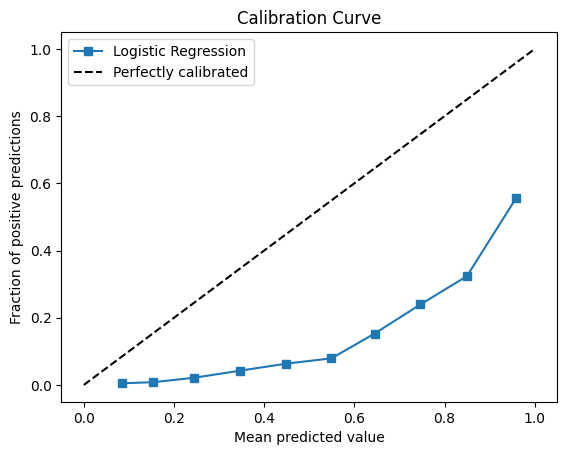

In [1071]:
# Calculate the fraction of positive predictions and the mean predicted value
frac_pos, mean_pred = calibration_curve(y_test, y_probs, n_bins=10)

# Plot the calibration curve
plt.plot(mean_pred, frac_pos, 's-', label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean predicted value')
plt.ylabel('Fraction of positive predictions')
plt.title("Calibration Curve")
plt.legend()
plt.show()

# Decision Tree Classifier

In [1072]:
from sklearn.tree import DecisionTreeClassifier

Prédictions : 

                          Model  Accuracy  Recall  Precision  F1_score     AUC
0            LogisticRegression   0.93099 0.06886    0.62234   0.54404 0.82892
0  Optimized_LogisticRegression   0.78808 0.74220    0.21377   0.60300 0.85033
0                  DecisionTree   0.89767 0.24308    0.26172   0.59857 0.59539


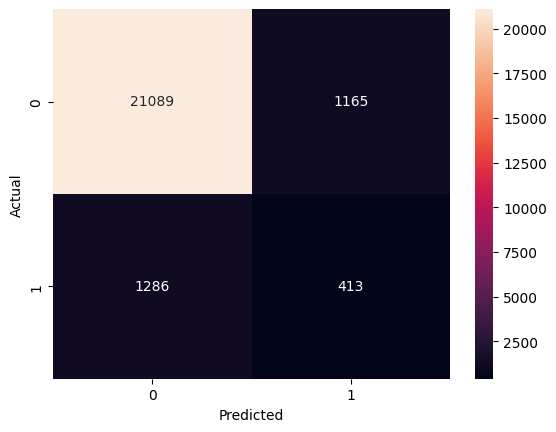

In [1073]:
Tree_clf = DecisionTreeClassifier(random_state= 42, class_weight= "balanced")
Tree_clf.fit(X_train, y_train)

print("Prédictions : \n")
y_pred = Tree_clf.predict(X_test)
y_probs_bs = Tree_clf.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs_bs, pos_label = 1)
score = auc(fpr, tpr)

#Store the performance in a df
result = pd.DataFrame({"Model" : ["DecisionTree"],
                       "Accuracy" : [accuracy_score(y_test, y_pred)],
                       "Recall" : [recall_score(y_test, y_pred)],
                       "Precision" : [precision_score(y_test, y_pred)],
                       "F1_score" : [f1_score(y_test, y_pred, average="macro")],
                       "AUC" : [score]}
                       )

model_result = pd.concat([model_result, result])
print(model_result)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

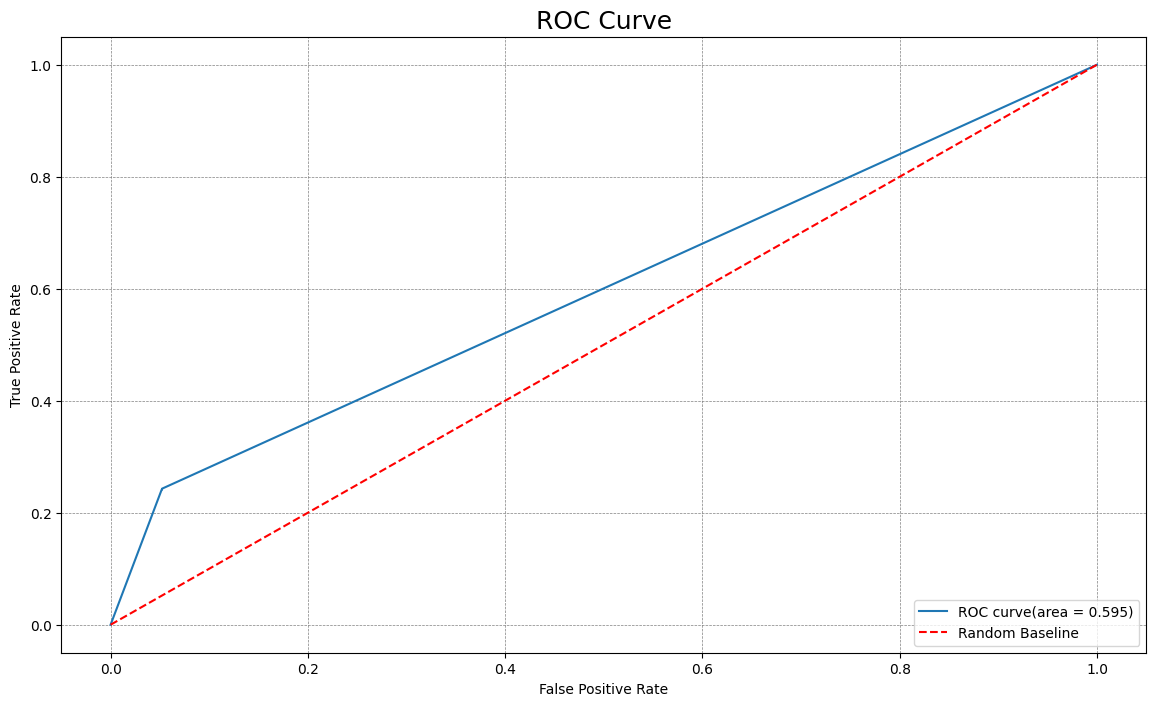

In [1074]:
plt.figure(figsize = (14, 8))
plt.plot(fpr, tpr, label="ROC curve(area = %0.3f)" % score)
plt.plot([0, 1], [0, 1], color="red",label="Random Baseline", linestyle="--")
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve", size=18)
plt.legend(loc="lower right")

<Axes: title={'center': "Features' Importance of Decision Tree"}, xlabel='importance', ylabel='feature'>

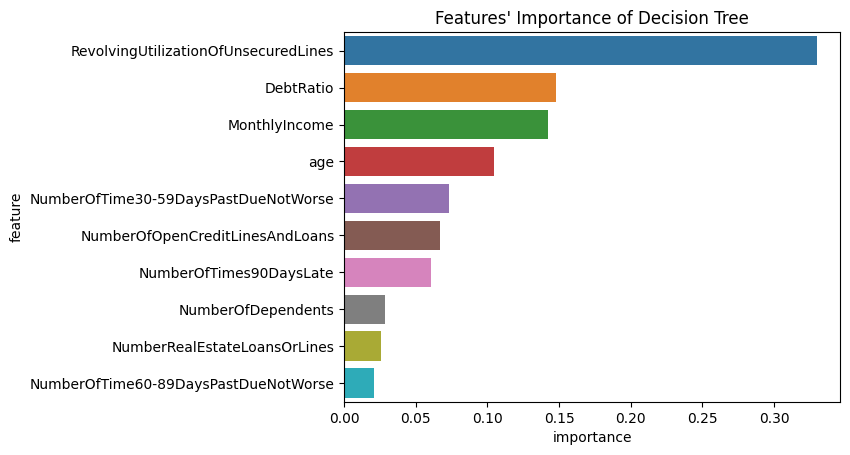

In [1075]:
# Feature of importance

importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': Tree_clf.feature_importances_

}).sort_values('importance', ascending=False)

plt.title("Features' Importance of Decision Tree")
sns.barplot(data=importance_df.head(10), x='importance', y='feature')

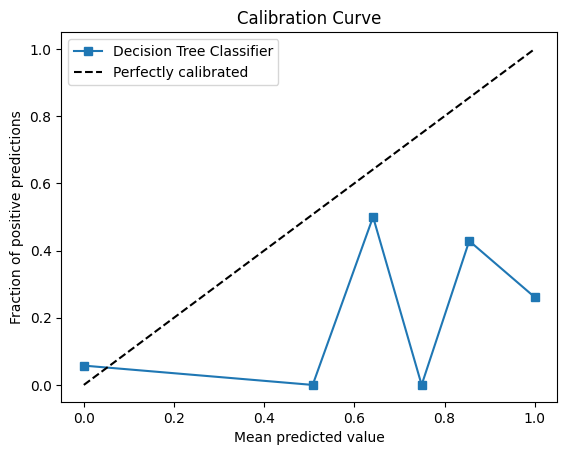

In [1076]:
# Calculate the fraction of positive predictions and the mean predicted value
frac_pos, mean_pred = calibration_curve(y_test, y_probs_bs, n_bins=10)

# Plot the calibration curve
plt.plot(mean_pred, frac_pos, 's-', label='Decision Tree Classifier')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean predicted value')
plt.ylabel('Fraction of positive predictions')
plt.title("Calibration Curve")
plt.legend()
plt.show()

Best parameters:  {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5, 'criterion': 'entropy'}

Prédiction :

                          Model  Accuracy  Recall  Precision  F1_score     AUC
0            LogisticRegression   0.93099 0.06886    0.62234   0.54404 0.82892
0  Optimized_LogisticRegression   0.78808 0.74220    0.21377   0.60300 0.85033
0                  DecisionTree   0.89767 0.24308    0.26172   0.59857 0.59539
0         OptimizedDecisionTree   0.93237 0.18128    0.57356   0.62001 0.84493


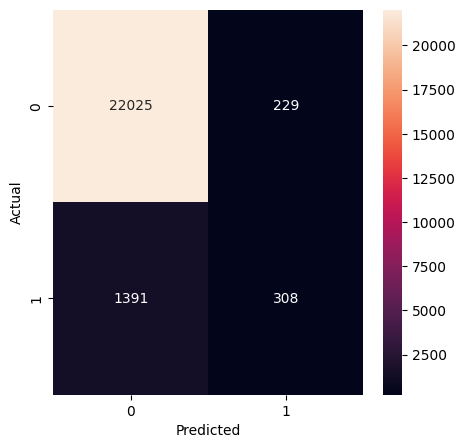

In [1077]:
#Best Model 

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
}

Tree_gr = DecisionTreeClassifier()

Tree_gr = RandomizedSearchCV(Tree_gr, param_distributions=param_grid, cv=cv,
                           scoring= "roc_auc", refit= "roc_auc", n_jobs=-1, error_score= 'raise')
Tree_gr.fit(X_train, y_train)

# print the best parameters and scores
print("Best parameters: ", Tree_gr.best_params_)

print("\nPrédiction :\n")
y_pred = Tree_gr.predict(X_test)
y_probs = Tree_gr.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label = 1)
score = auc(fpr, tpr)


#Store the performance in a df
result = pd.DataFrame({"Model" : ["OptimizedDecisionTree"],
                       "Accuracy" : [accuracy_score(y_test, y_pred)],
                       "Recall" : [recall_score(y_test, y_pred)],
                       "Precision" : [precision_score(y_test, y_pred)],
                       "F1_score" : [f1_score(y_test, y_pred, average="macro")],
                       "AUC" : [score]}
                       )

model_result = pd.concat([model_result, result])
print(model_result)

# making the confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

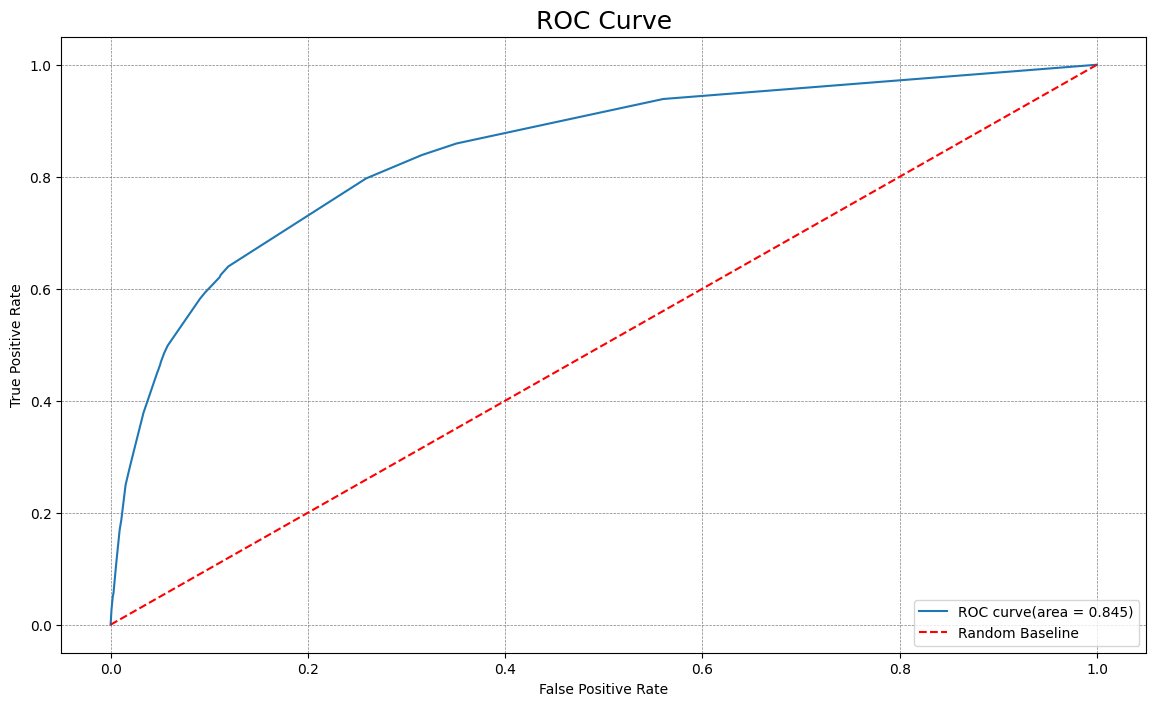

In [1078]:
plt.figure(figsize = (14, 8))
plt.plot(fpr, tpr, label="ROC curve(area = %0.3f)" % score)
plt.plot([0, 1], [0, 1], color="red",label="Random Baseline", linestyle="--")
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve", size=18)
plt.legend(loc="lower right")

<Axes: title={'center': "Features' Importance of Optimized Decision Tree"}, xlabel='importance', ylabel='feature'>

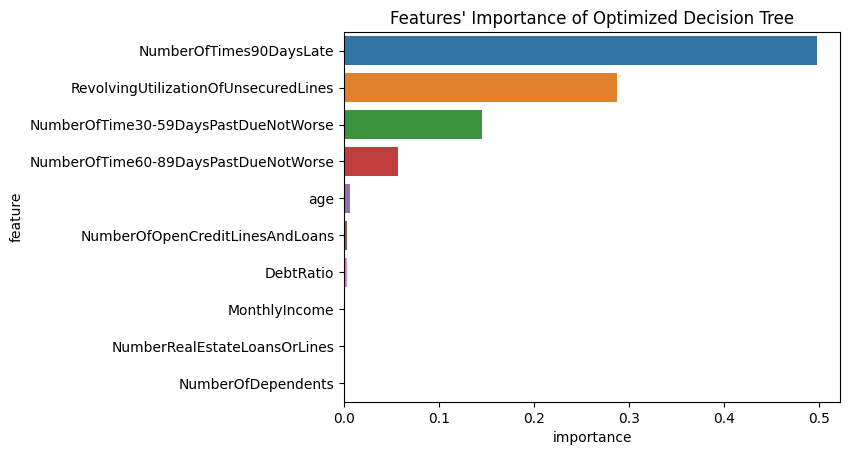

In [1079]:
# Feature of importance
estimator = Tree_gr.best_estimator_

# Obtain feature importances
importances = estimator.feature_importances_

importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances

}).sort_values('importance', ascending=False)


plt.title("Features' Importance of Optimized Decision Tree")
sns.barplot(data=importance_df.head(10), x='importance', y='feature')


# Descent Gradient 


Prédiction :

                          Model  Accuracy  Recall  Precision  F1_score     AUC
0            LogisticRegression   0.93099 0.06886    0.62234   0.54404 0.82892
0  Optimized_LogisticRegression   0.78808 0.74220    0.21377   0.60300 0.85033
0                  DecisionTree   0.89767 0.24308    0.26172   0.59857 0.59539
0         OptimizedDecisionTree   0.93237 0.18128    0.57356   0.62001 0.84493
0              GradientBoosting   0.93345 0.19717    0.59292   0.63051 0.86051


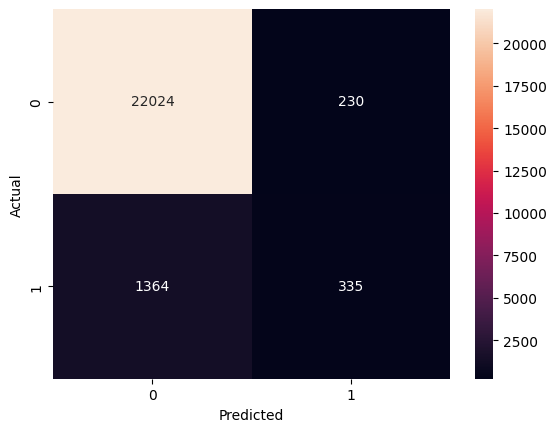

In [1080]:
dg_clf = GradientBoostingClassifier()
dg_clf.fit(X_train, y_train)

print("\nPrédiction :\n")
y_pred = dg_clf.predict(X_test)
y_probs_bs = dg_clf.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs_bs, pos_label = 1)
score = auc(fpr, tpr)
#Store the performance in a df
result = pd.DataFrame({"Model" : ["GradientBoosting"],
                       "Accuracy" : [accuracy_score(y_test, y_pred)],
                       "Recall" : [recall_score(y_test, y_pred)],
                       "Precision" : [precision_score(y_test, y_pred)],
                       "F1_score" : [f1_score(y_test, y_pred, average="macro")],
                       "AUC" : [score]}
                       )

model_result = pd.concat([model_result, result])
print(model_result)


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

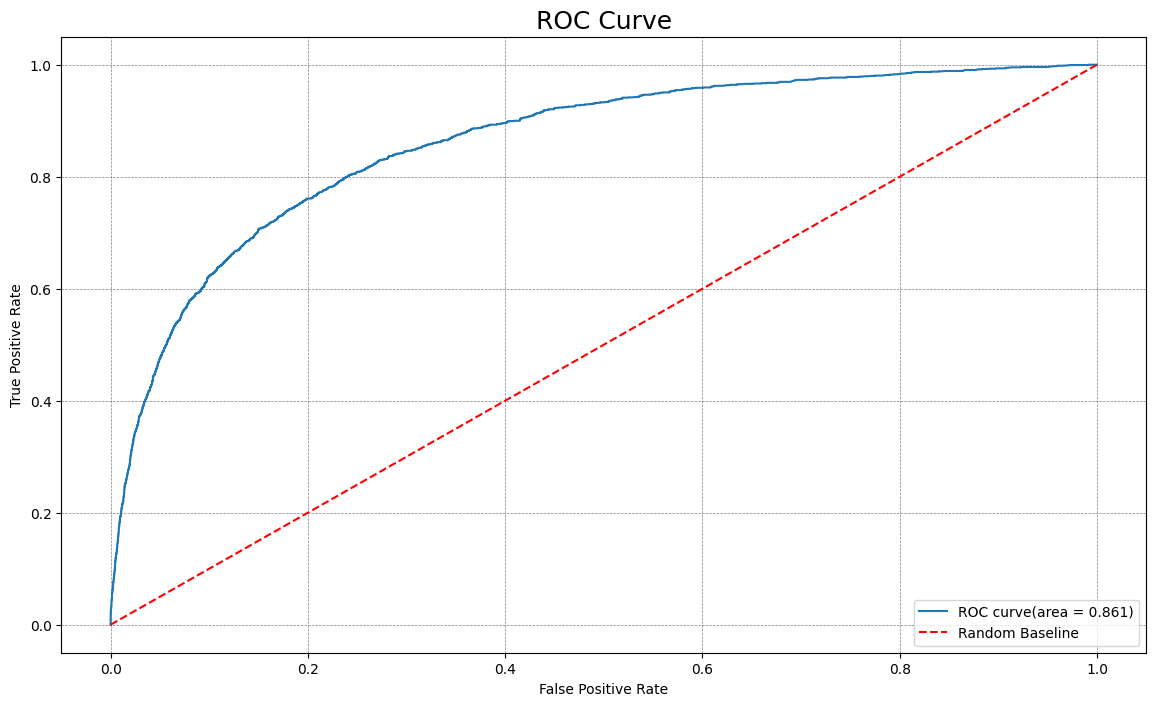

In [1081]:
plt.figure(figsize = (14, 8))
plt.plot(fpr, tpr, label="ROC curve(area = %0.3f)" % score)
plt.plot([0, 1], [0, 1], color="red",label="Random Baseline", linestyle="--")
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve", size=18)
plt.legend(loc="lower right")

<Axes: title={'center': "Features' Importance of Gradient Boosting Classifier"}, xlabel='importance', ylabel='feature'>

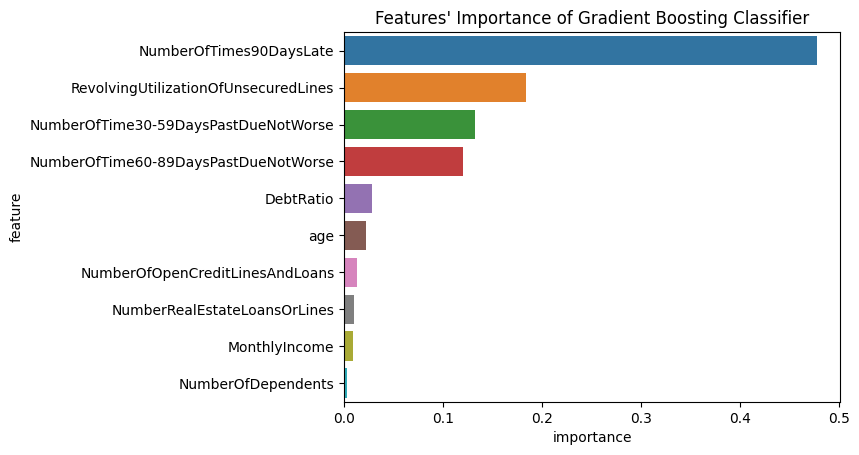

In [1082]:
# Obtain feature importances
importances = dg_clf.feature_importances_

importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances

}).sort_values('importance', ascending=False)


plt.title("Features' Importance of Gradient Boosting Classifier")
sns.barplot(data=importance_df.head(10), x='importance', y='feature')

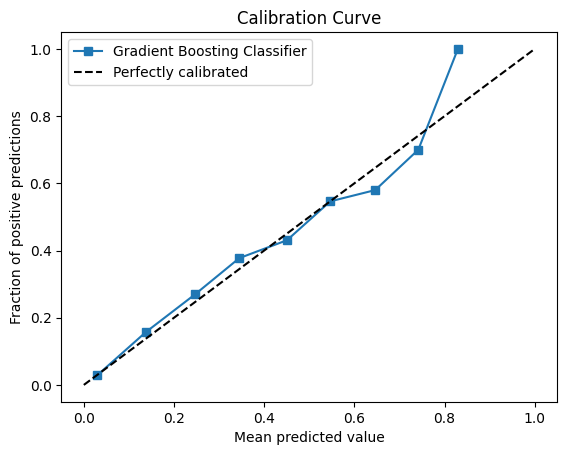

In [1083]:
# Calculate the fraction of positive predictions and the mean predicted value
frac_pos, mean_pred = calibration_curve(y_test, y_probs_bs, n_bins=10)

# Plot the calibration curve
plt.plot(mean_pred, frac_pos, 's-', label='Gradient Boosting Classifier')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean predicted value')
plt.ylabel('Fraction of positive predictions')
plt.title("Calibration Curve")
plt.legend()
plt.show()

Best parameters:  {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}

Prédiction :

                          Model  Accuracy  Recall  Precision  F1_score     AUC
0            LogisticRegression   0.93099 0.06886    0.62234   0.54404 0.82892
0  Optimized_LogisticRegression   0.78808 0.74220    0.21377   0.60300 0.85033
0                  DecisionTree   0.89767 0.24308    0.26172   0.59857 0.59539
0         OptimizedDecisionTree   0.93237 0.18128    0.57356   0.62001 0.84493
0              GradientBoosting   0.93345 0.19717    0.59292   0.63051 0.86051
0     OptimizedGradientBoosting   0.93329 0.19305    0.59099   0.62802 0.86061


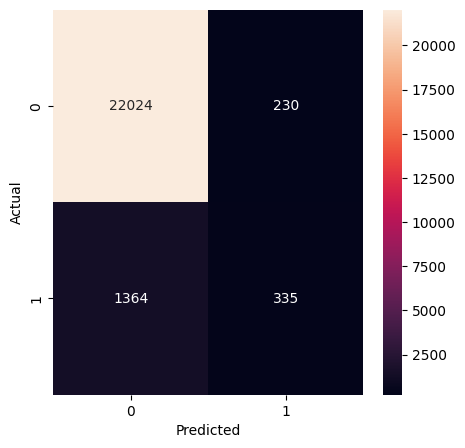

In [1084]:
# Best Model

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5],
}

# Create an XGBoost classifier object
dg_gr = GradientBoostingClassifier()

# Create a GridSearchCV object
dg_gr = RandomizedSearchCV(
    dg_gr, param_distributions= param_grid, scoring= "roc_auc", refit= "roc_auc",
    cv=cv, n_jobs=-1
)

dg_gr.fit(X_train, y_train)


# print the best parameters and scores
print("Best parameters: ", dg_gr.best_params_)


print("\nPrédiction :\n")
y_pred_gb = dg_gr.predict(X_test)
y_probs_gb = dg_gr.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs_gb, pos_label = 1)
score = auc(fpr, tpr)
#Store the performance in a df
result = pd.DataFrame({"Model" : ["OptimizedGradientBoosting"],
                       "Accuracy" : [accuracy_score(y_test, y_pred_gb)],
                       "Recall" : [recall_score(y_test, y_pred_gb)],
                       "Precision" : [precision_score(y_test, y_pred_gb)],
                       "F1_score" : [f1_score(y_test, y_pred_gb, average="macro")],
                       "AUC" : [score]}
                       )

model_result = pd.concat([model_result, result])
print(model_result)

# making the confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

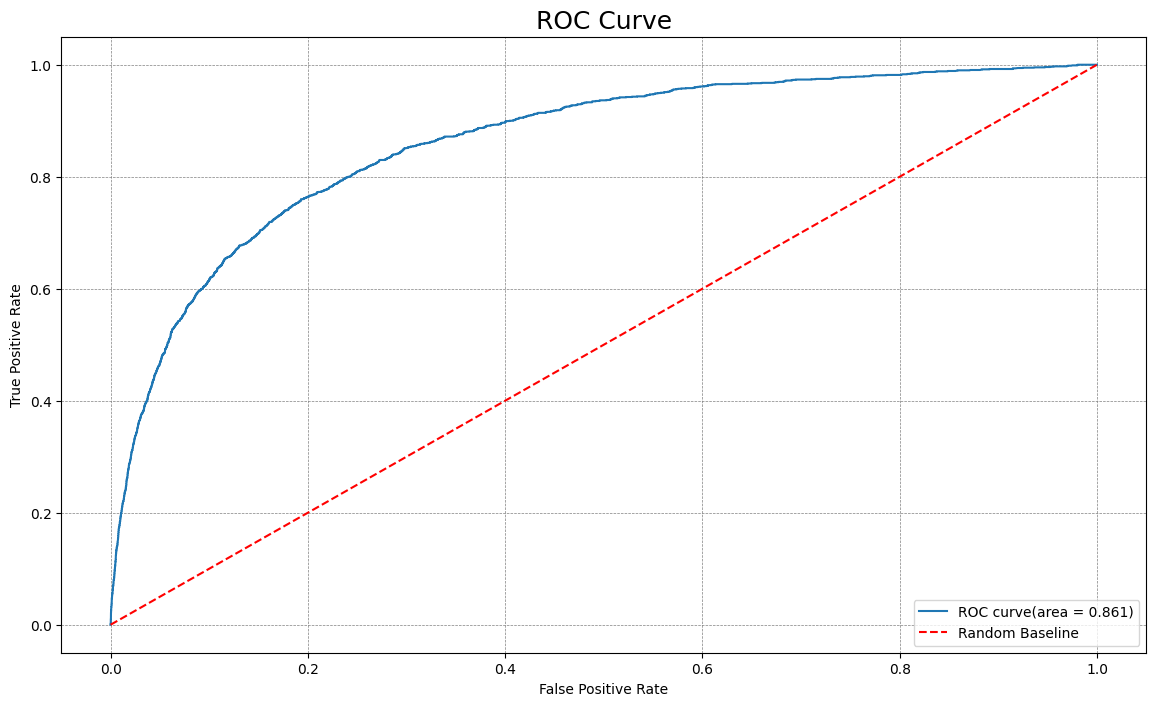

In [1085]:
plt.figure(figsize = (14, 8))
plt.plot(fpr, tpr, label="ROC curve(area = %0.3f)" % score)
plt.plot([0, 1], [0, 1], color="red",label="Random Baseline", linestyle="--")
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve", size=18)
plt.legend(loc="lower right")

<Axes: title={'center': "Features' Importance of Optimized Gradient Boosting"}, xlabel='importance', ylabel='feature'>

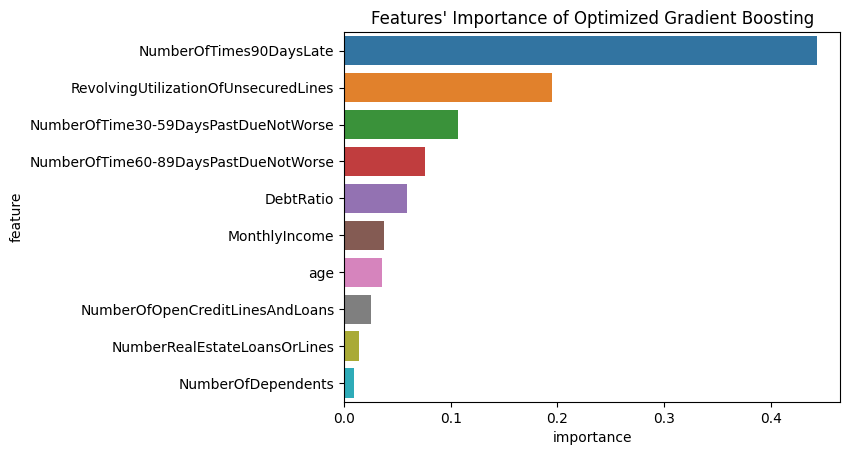

In [1086]:
# Feature of importance
estimator = dg_gr.best_estimator_

# Obtain feature importances
importances = estimator.feature_importances_

importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances

}).sort_values('importance', ascending=False)


plt.title("Features' Importance of Optimized Gradient Boosting")
sns.barplot(data=importance_df.head(10), x='importance', y='feature')

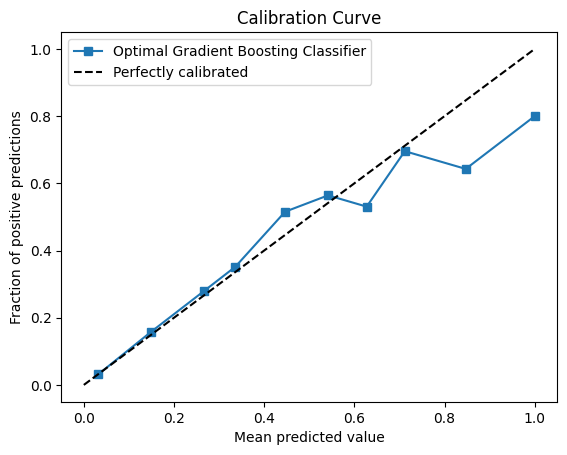

In [1087]:
# Calculate the fraction of positive predictions and the mean predicted value
frac_pos, mean_pred = calibration_curve(y_test, y_probs, n_bins=10)

# Plot the calibration curve
plt.plot(mean_pred, frac_pos, 's-', label='Optimal Gradient Boosting Classifier')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean predicted value')
plt.ylabel('Fraction of positive predictions')
plt.legend()
plt.title("Calibration Curve")
plt.show()

# Random Forest


Prédictions : 

                          Model  Accuracy  Recall  Precision  F1_score     AUC
0            LogisticRegression   0.93099 0.06886    0.62234   0.54404 0.82892
0  Optimized_LogisticRegression   0.78808 0.74220    0.21377   0.60300 0.85033
0                  DecisionTree   0.89767 0.24308    0.26172   0.59857 0.59539
0         OptimizedDecisionTree   0.93237 0.18128    0.57356   0.62001 0.84493
0              GradientBoosting   0.93345 0.19717    0.59292   0.63051 0.86051
0     OptimizedGradientBoosting   0.93329 0.19305    0.59099   0.62802 0.86061
0                  RandomForest   0.93249 0.18835    0.57348   0.62407 0.83610


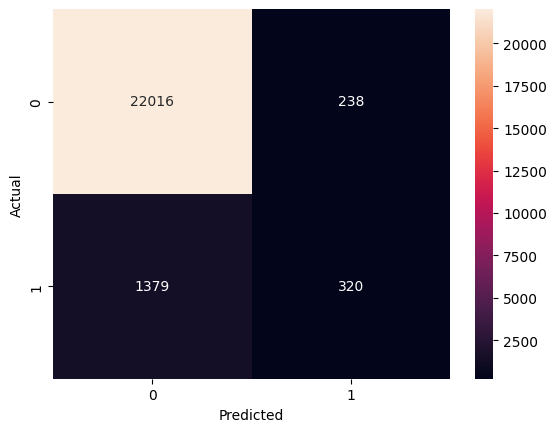

In [1088]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

print("\nPrédictions : \n")
y_pred = rf_clf.predict(X_test)
y_probs_bs = rf_clf.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs_bs, pos_label = 1)
score = auc(fpr, tpr)

#Store the performance in a df
result = pd.DataFrame({"Model" : ["RandomForest"],
                       "Accuracy" : [accuracy_score(y_test, y_pred)],
                       "Recall" : [recall_score(y_test, y_pred)],
                       "Precision" : [precision_score(y_test, y_pred)],
                       "F1_score" : [f1_score(y_test, y_pred, average="macro")],
                       "AUC" : [score]}
                       )

model_result = pd.concat([model_result, result])
print(model_result)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

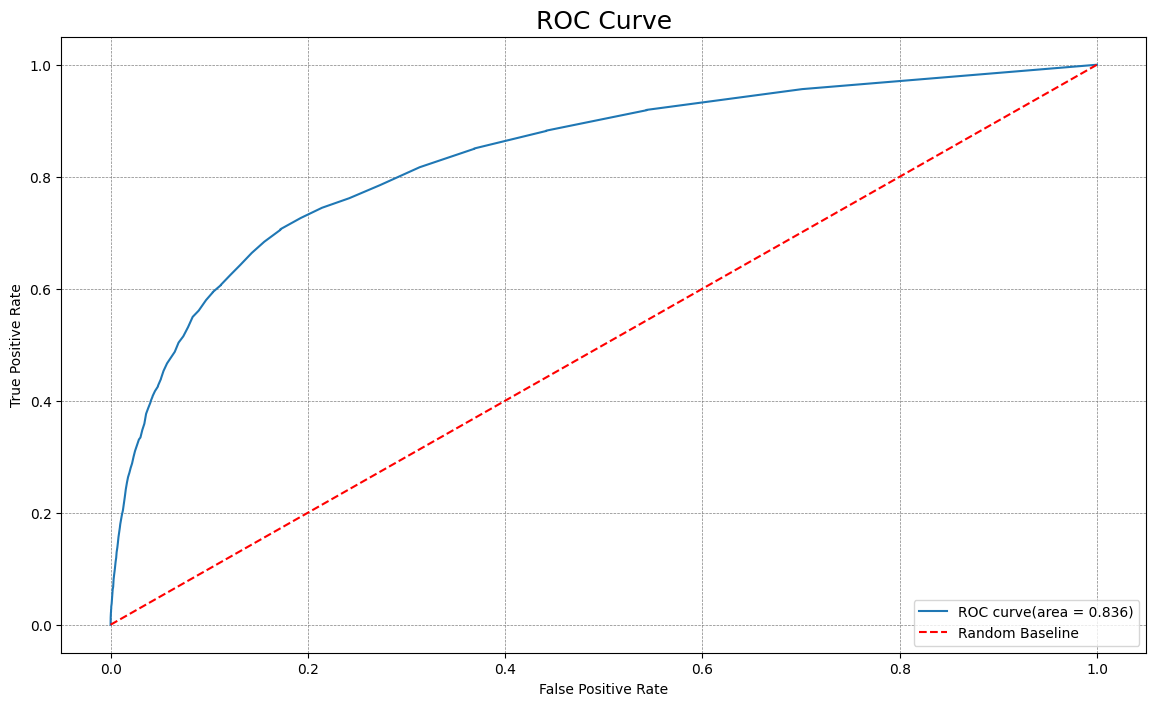

In [1089]:
plt.figure(figsize = (14, 8))
plt.plot(fpr, tpr, label="ROC curve(area = %0.3f)" % score)
plt.plot([0, 1], [0, 1], color="red",label="Random Baseline", linestyle="--")
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve", size=18)
plt.legend(loc="lower right")

<Axes: title={'center': "Features' Importance of Random Forest"}, xlabel='importance', ylabel='feature'>

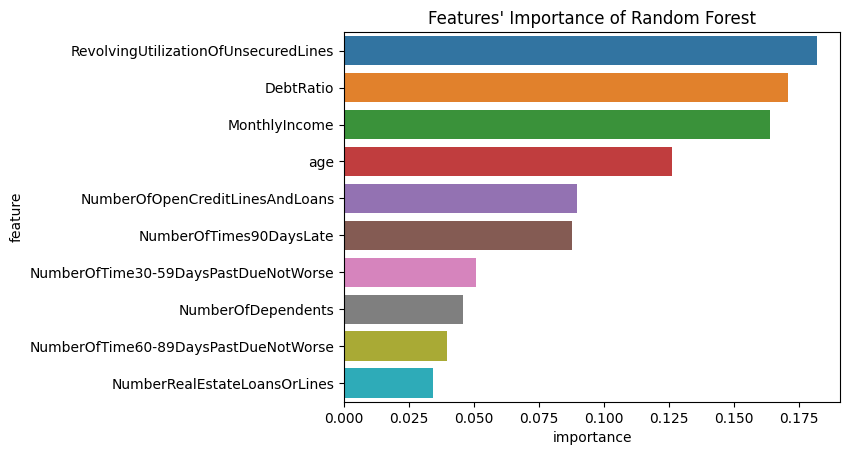

In [1090]:
# Obtain feature importances
importances = rf_clf.feature_importances_

importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances

}).sort_values('importance', ascending=False)


plt.title("Features' Importance of Random Forest")
sns.barplot(data=importance_df.head(10), x='importance', y='feature')

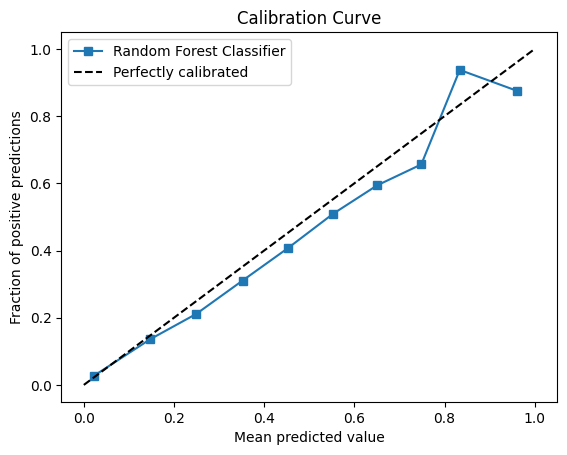

In [1091]:
# Calculate the fraction of positive predictions and the mean predicted value
frac_pos, mean_pred = calibration_curve(y_test, y_probs_bs, n_bins=10)

# Plot the calibration curve
plt.plot(mean_pred, frac_pos, 's-', label='Random Forest Classifier')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean predicted value')
plt.ylabel('Fraction of positive predictions')
plt.title("Calibration Curve")
plt.legend()
plt.show()

/Users/alexisrevelle/miniconda3/envs/credit_risque/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'class_weight': None, 'bootstrap': True}

Prédiction :

                          Model  Accuracy  Recall  Precision  F1_score     AUC
0            LogisticRegression   0.93099 0.06886    0.62234   0.54404 0.82892
0  Optimized_LogisticRegression   0.78808 0.74220    0.21377   0.60300 0.85033
0                  DecisionTree   0.89767 0.24308    0.26172   0.59857 0.59539
0         OptimizedDecisionTree   0.93237 0.18128    0.57356   0.62001 0.84493
0              GradientBoosting   0.93345 0.19717    0.59292   0.63051 0.86051
0     OptimizedGradientBoosting   0.93329 0.19305    0.59099   0.62802 0.86061
0                  RandomForest   0.93249 0.18835    0.57348   0.62407 0.83610
0     OptimizedRandomizedForest   0.93387 0.19423    0.60550   0.62971 0.84686


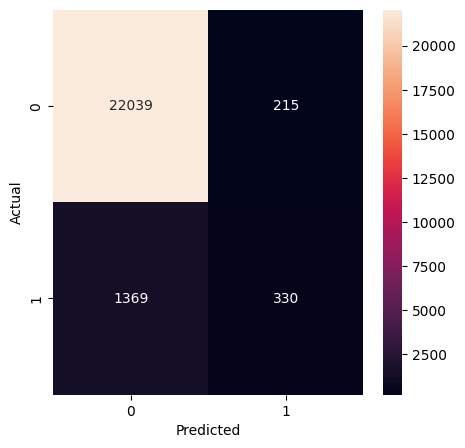

In [1092]:
# Best Model

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'class_weight': [None, weight_dict]
}


# Create an XGBoost classifier object
rf_gr = RandomForestClassifier()

# Create a GridSearchCV object
rf_gr = RandomizedSearchCV(
    rf_gr, param_distributions= param_grid, scoring= "roc_auc", refit= "roc_auc",
    cv=cv, n_jobs=-1
)

rf_gr.fit(X_train, y_train)


# print the best parameters and scores
print("Best parameters: ", rf_gr.best_params_)


print("\nPrédiction :\n")
y_pred_rf = rf_gr.predict(X_test)
y_probs_rf = rf_gr.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs_rf, pos_label = 1)
score = auc(fpr, tpr)

#Store the performance in a df
result = pd.DataFrame({"Model" : ["OptimizedRandomizedForest"],
                       "Accuracy" : [accuracy_score(y_test, y_pred_rf)],
                       "Recall" : [recall_score(y_test, y_pred_rf)],
                       "Precision" : [precision_score(y_test, y_pred_rf)],
                       "F1_score" : [f1_score(y_test, y_pred_rf, average="macro")],
                       "AUC" : [score]}
                       )

model_result = pd.concat([model_result, result])
print(model_result)

# making the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

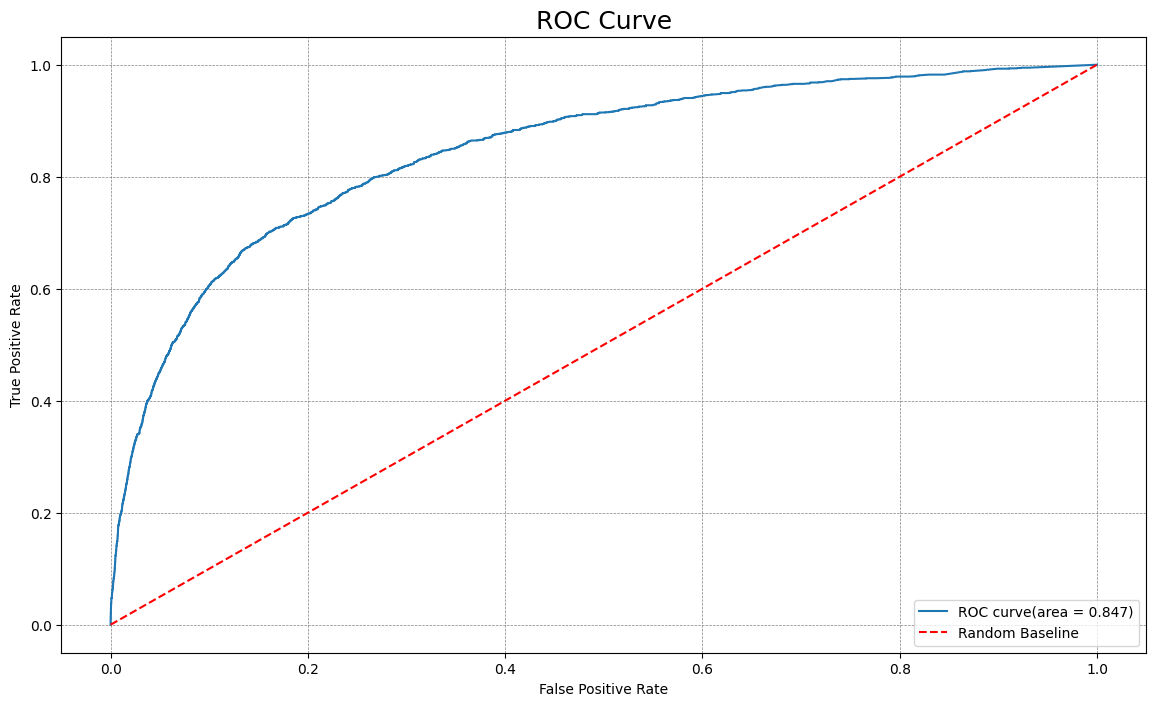

In [1093]:
plt.figure(figsize = (14, 8))
plt.plot(fpr, tpr, label="ROC curve(area = %0.3f)" % score)
plt.plot([0, 1], [0, 1], color="red",label="Random Baseline", linestyle="--")
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve", size=18)
plt.legend(loc="lower right")

<Axes: title={'center': "Features' Importance of Optimized Random Forest Classifier"}, xlabel='importance', ylabel='feature'>

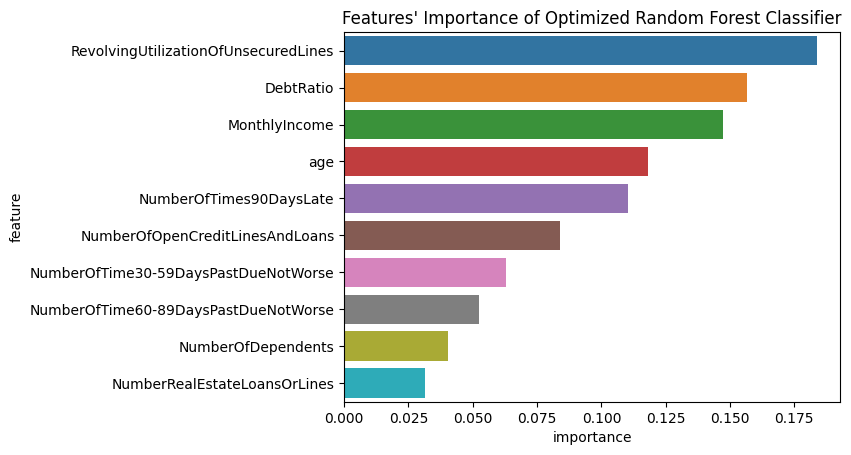

In [1094]:
# Feature of importance
estimator = rf_gr.best_estimator_

# Obtain feature importances
importances = estimator.feature_importances_

importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances

}).sort_values('importance', ascending=False)


plt.title("Features' Importance of Optimized Random Forest Classifier")
sns.barplot(data=importance_df.head(10), x='importance', y='feature')

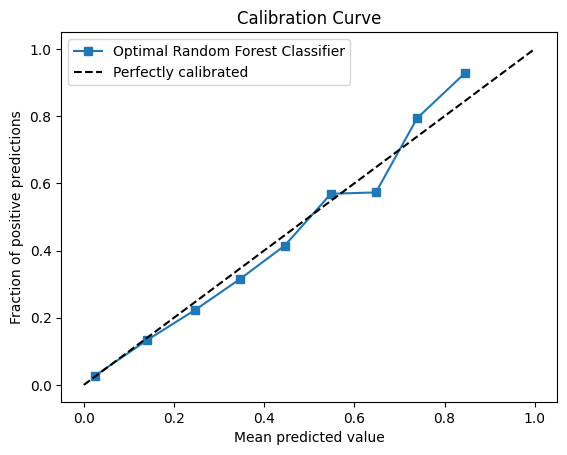

In [1095]:
# Calculate the fraction of positive predictions and the mean predicted value
frac_pos, mean_pred = calibration_curve(y_test, y_probs_rf, n_bins=10)

# Plot the calibration curve
plt.plot(mean_pred, frac_pos, 's-', label='Optimal Random Forest Classifier')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean predicted value')
plt.ylabel('Fraction of positive predictions')
plt.title("Calibration Curve")
plt.legend()
plt.show()

# XGBOOST


Prédictions : 

                          Model  Accuracy  Recall  Precision  F1_score     AUC
0            LogisticRegression   0.93099 0.06886    0.62234   0.54404 0.82892
0  Optimized_LogisticRegression   0.78808 0.74220    0.21377   0.60300 0.85033
0                  DecisionTree   0.89767 0.24308    0.26172   0.59857 0.59539
0         OptimizedDecisionTree   0.93237 0.18128    0.57356   0.62001 0.84493
0              GradientBoosting   0.93345 0.19717    0.59292   0.63051 0.86051
0     OptimizedGradientBoosting   0.93329 0.19305    0.59099   0.62802 0.86061
0                  RandomForest   0.93249 0.18835    0.57348   0.62407 0.83610
0     OptimizedRandomizedForest   0.93387 0.19423    0.60550   0.62971 0.84686
0                       XGBoost   0.93304 0.19364    0.58437   0.62788 0.84686


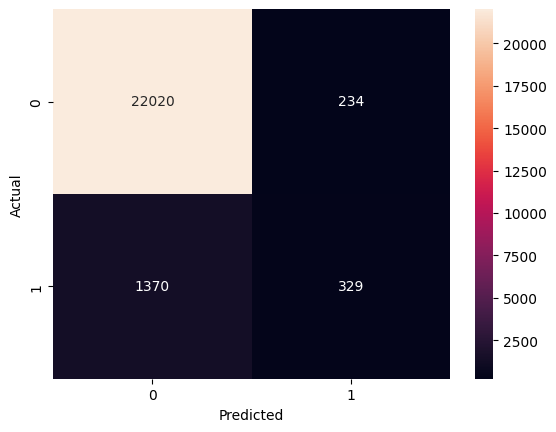

In [1096]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

print("\nPrédictions : \n")
y_pred = xgb_clf.predict(X_test)
y_probs_bs = xgb_clf.predict_proba(X_test)[:,1]

#Store the performance in a df
result = pd.DataFrame({"Model" : ["XGBoost"],
                       "Accuracy" : [accuracy_score(y_test, y_pred)],
                       "Recall" : [recall_score(y_test, y_pred)],
                       "Precision" : [precision_score(y_test, y_pred)],
                       "F1_score" : [f1_score(y_test, y_pred, average="macro")],
                       "AUC" : [score]}
                       )

model_result = pd.concat([model_result, result])
print(model_result)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

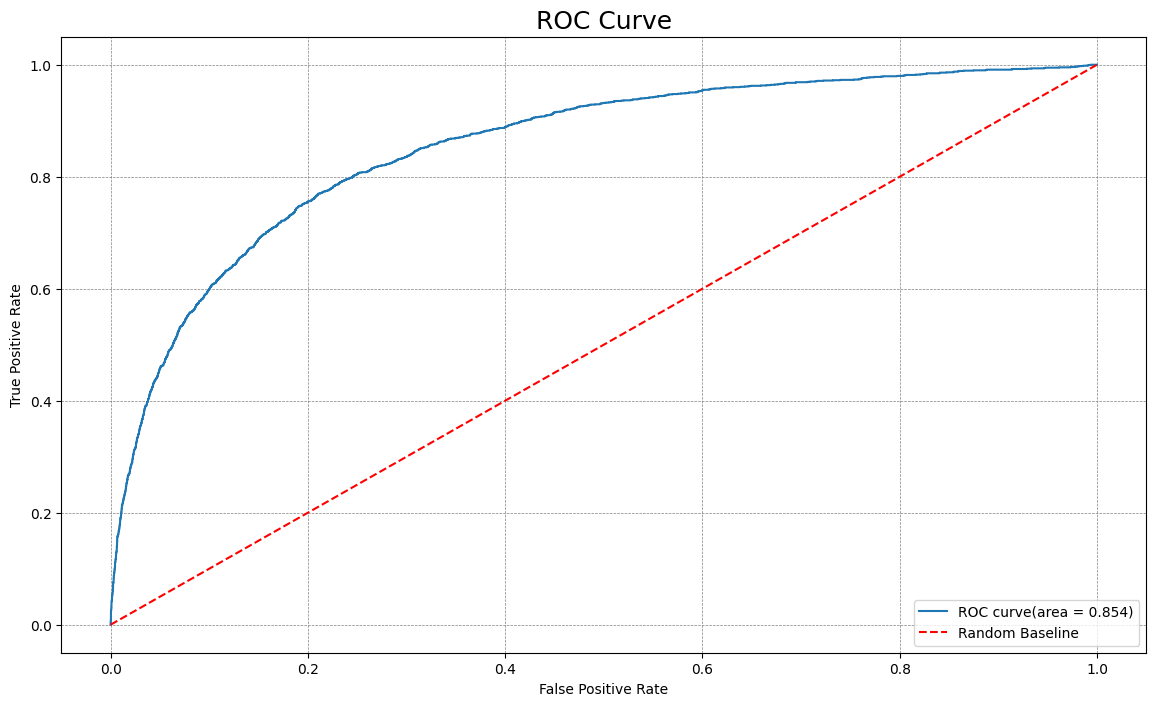

In [1097]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_bs, pos_label = 1)
score = auc(fpr, tpr)
plt.figure(figsize = (14, 8))
plt.plot(fpr, tpr, label="ROC curve(area = %0.3f)" % score)
plt.plot([0, 1], [0, 1], color="red",label="Random Baseline", linestyle="--")
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve", size=18)
plt.legend(loc="lower right")

<Axes: title={'center': "Features' Importance of XGBoost"}, xlabel='importance', ylabel='feature'>

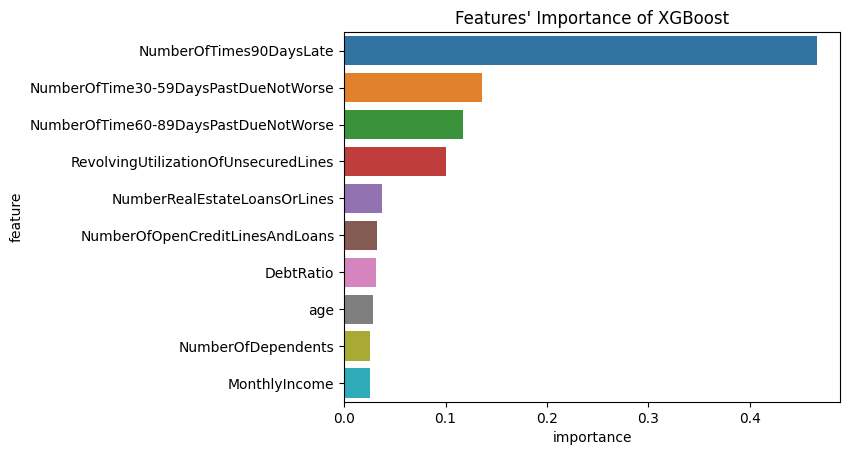

In [1098]:
# Obtain feature importances
importances = xgb_clf.feature_importances_

importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances

}).sort_values('importance', ascending=False)


plt.title("Features' Importance of XGBoost")
sns.barplot(data=importance_df.head(10), x='importance', y='feature')

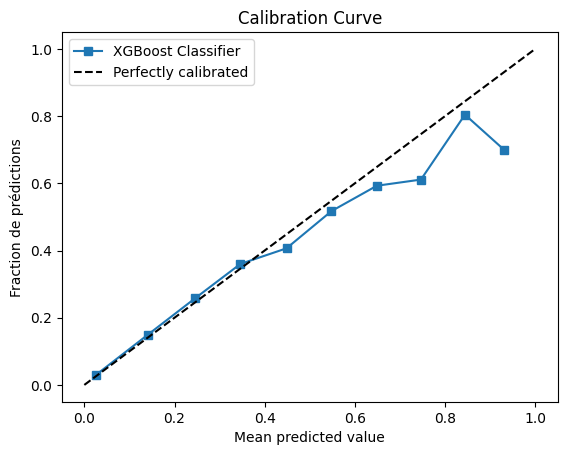

In [1099]:
# Calculate the fraction of positive predictions and the mean predicted value
frac_pos, mean_pred = calibration_curve(y_test, y_probs_bs, n_bins=10)

# Plot the calibration curve
plt.plot(mean_pred, frac_pos, 's-', label='XGBoost Classifier')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean predicted value')
plt.ylabel('Fraction de prédictions')
plt.title("Calibration Curve")
plt.legend()
plt.show()

Best parameters:  {'scale_pos_weight': 0.5373166135762035, 'n_estimators': 100, 'learning_rate': 0.1, 'gamma': 0}

Prédiction :

                          Model  Accuracy  Recall  Precision  F1_score     AUC
0            LogisticRegression   0.93099 0.06886    0.62234   0.54404 0.82892
0  Optimized_LogisticRegression   0.78808 0.74220    0.21377   0.60300 0.85033
0                  DecisionTree   0.89767 0.24308    0.26172   0.59857 0.59539
0         OptimizedDecisionTree   0.93237 0.18128    0.57356   0.62001 0.84493
0              GradientBoosting   0.93345 0.19717    0.59292   0.63051 0.86051
0     OptimizedGradientBoosting   0.93329 0.19305    0.59099   0.62802 0.86061
0                  RandomForest   0.93249 0.18835    0.57348   0.62407 0.83610
0     OptimizedRandomizedForest   0.93387 0.19423    0.60550   0.62971 0.84686
0                       XGBoost   0.93304 0.19364    0.58437   0.62788 0.84686
0              OptimizedXGBoost   0.93228 0.08299    0.68780   0.55642 0.86089


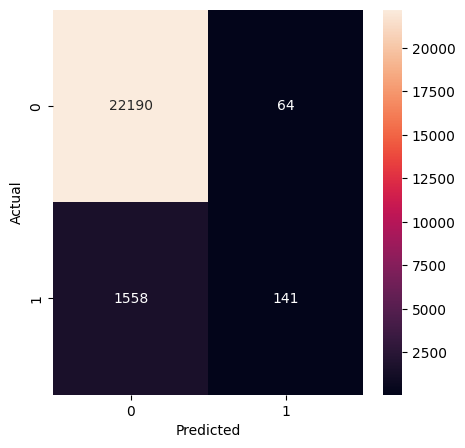

In [1100]:
# Best Model

param_grid = {
    'learning_rate': [0.1, 0.01],
    'n_estimators': [50, 100, 200],
    'gamma': [0, 0.1, 0.01],
    'scale_pos_weight' : [None] + list(weights)
}

# Create an XGBoost classifier object
xgb_gr = XGBClassifier()

# Create a GridSearchCV object
xgb_gr = RandomizedSearchCV(
    xgb_gr, param_distributions= param_grid, scoring= "roc_auc", refit= "roc_auc",
    cv=cv, n_jobs=-1
)

xgb_gr.fit(X_train, y_train)


# print the best parameters and scores
print("Best parameters: ", xgb_gr.best_params_)


print("\nPrédiction :\n")
y_pred_xgb = xgb_gr.predict(X_test)
y_probs_xgb = xgb_gr.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs_xgb, pos_label = 1)
score = auc(fpr, tpr)

#Store the performance in a df
result = pd.DataFrame({"Model" : ["OptimizedXGBoost"],
                       "Accuracy" : [accuracy_score(y_test, y_pred_xgb)],
                       "Recall" : [recall_score(y_test, y_pred_xgb)],
                       "Precision" : [precision_score(y_test, y_pred_xgb)],
                       "F1_score" : [f1_score(y_test, y_pred_xgb, average="macro")],
                       "AUC" : [score]}
                       )

model_result = pd.concat([model_result, result])
print(model_result)

# making the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


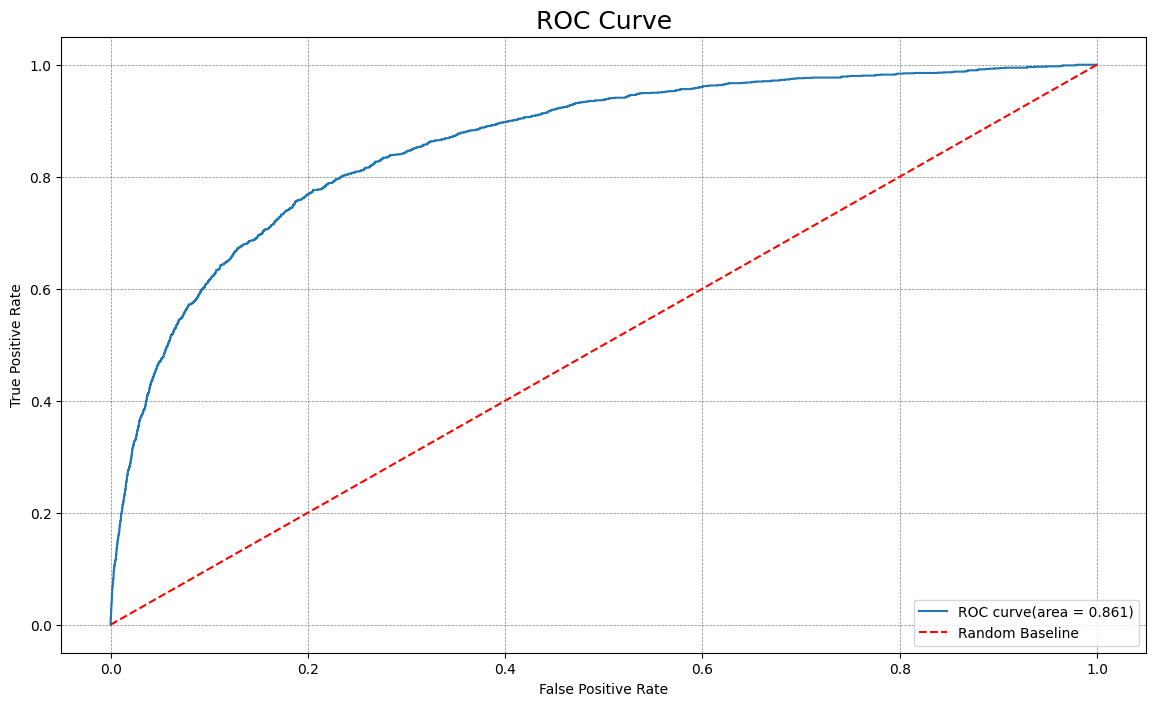

In [1101]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_xgb, pos_label = 1)
score = auc(fpr, tpr)
plt.figure(figsize = (14, 8))
plt.plot(fpr, tpr, label="ROC curve(area = %0.3f)" % score)
plt.plot([0, 1], [0, 1], color="red",label="Random Baseline", linestyle="--")
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve", size=18)
plt.legend(loc="lower right")

<Axes: title={'center': "Features' Importance of Optimized XGBoost Classifier"}, xlabel='importance', ylabel='feature'>

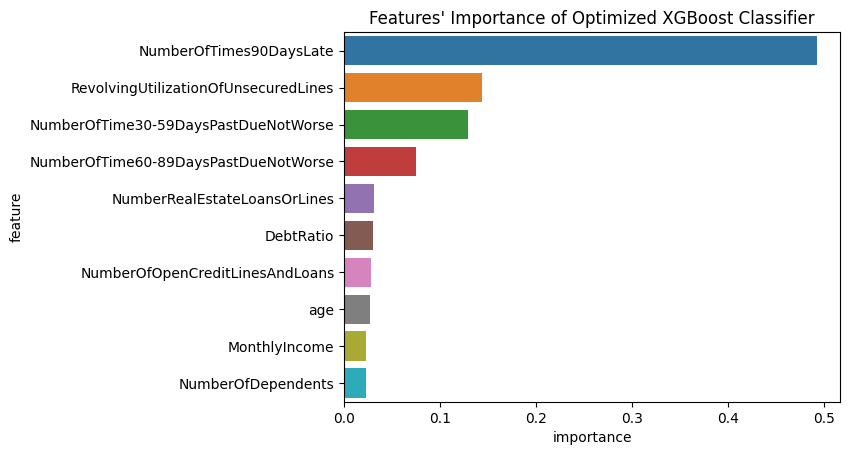

In [1102]:
# Feature of importance
estimator = xgb_gr.best_estimator_

# Obtain feature importances
importances = estimator.feature_importances_

importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances

}).sort_values('importance', ascending=False)


plt.title("Features' Importance of Optimized XGBoost Classifier")
sns.barplot(data=importance_df.head(10), x='importance', y='feature')

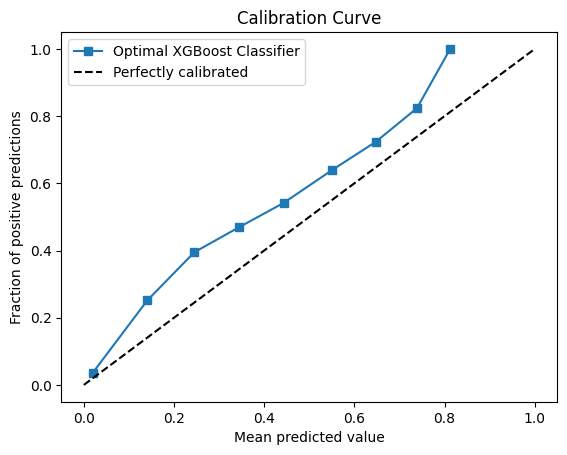

In [1103]:
# Calculate the fraction of positive predictions and the mean predicted value
frac_pos, mean_pred = calibration_curve(y_test, y_probs_xgb, n_bins=10)

# Plot the calibration curve
plt.plot(mean_pred, frac_pos, 's-', label="Optimal XGBoost Classifier")
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean predicted value')
plt.ylabel('Fraction of positive predictions')
plt.title("Calibration Curve")
plt.legend()
plt.show()

# Model Comparison

In [1104]:
model_result.to_excel("output/Result_model.xlsx")

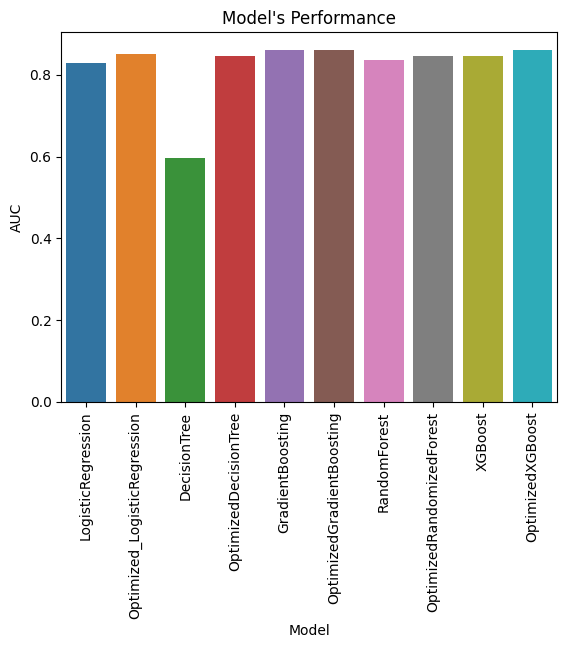

In [1105]:
sns.barplot(data=model_result, x="Model", y="AUC")
plt.xticks(rotation=90)
plt.title("Model's Performance")
plt.show()

# Grille de Probabilité

In [1106]:
y_probs_xgb = xgb_gr.predict_proba(X_test)
y_probs_xgb

array([[0.98955137, 0.01044862],
       [0.9875328 , 0.01246719],
       [0.96955055, 0.03044943],
       ...,
       [0.9959971 , 0.00400291],
       [0.9931698 , 0.00683021],
       [0.96415377, 0.03584624]], dtype=float32)

In [1107]:
#On reconstruit notre échantillon test non normalisé sur le même seed pour créer nos classe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)
X_test

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,class_RevolvingUtilizationOfUnsecuredLines
134277,0.02451,62,0,0.74550,4384.00000,17,0,2,0,0.00000,1
74593,0.36287,70,0,0.44075,3400.00000,10,0,1,0,0.00000,2
37031,0.16453,51,1,0.50850,5000.00000,10,0,1,0,1.00000,1
105659,0.07781,59,0,0.30431,6200.00000,13,0,2,0,0.00000,1
123841,0.04176,69,0,0.08694,5750.00000,4,0,1,0,1.00000,1
...,...,...,...,...,...,...,...,...,...,...,...
35129,0.71586,60,0,1.47413,4270.00000,8,0,2,0,0.00000,2
59695,1.00000,62,0,0.27110,7000.00000,7,0,1,0,0.00000,2
107049,0.03740,88,0,0.29027,1880.00000,2,0,0,0,0.00000,1
4642,0.00129,38,0,0.40224,7333.00000,13,0,1,0,0.00000,1


In [1108]:
X_test["ProbToNotDefault"] = y_probs_xgb[:,0]
X_test["ProbToDefault"] = y_probs_xgb[:,1]

In [1109]:
X_test[["RevolvingUtilizationOfUnsecuredLines", "DebtRatio", "MonthlyIncome", "ProbToNotDefault", "ProbToDefault"]].reset_index(drop = True).head().to_excel("output/ProbGrid.xlsx")